# Descriptive Statistics Task

Data Source: [Kaggle](https://www.kaggle.com/datasets/msnbehdani/mock-dataset-of-second-hand-car-sales)

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
# data read
data = pd.read_csv('/content/processed_car_sales_data.csv')
data.head()

Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0         Ford      Fiesta          1.0    Petrol                 2002   
1      Porsche  718 Cayman          4.0    Petrol                 2016   
2         Ford      Mondeo          1.6    Diesel                 2014   
3       Toyota        RAV4          1.8    Hybrid                 1988   
4           VW        Polo          1.0    Petrol                 2006   

   Mileage  Price  
0   127300   3074  
1    57850  49704  
2    39190  24072  
3   210814   1705  
4   127869   4101

In [3]:
data.describe()

Engine size  Year of manufacture        Mileage          Price
count  49988.000000         49988.000000   49988.000000   49988.000000
mean       1.773140          2004.209630  112515.561215   13829.112387
std        0.734149             9.646056   71624.341062   16417.812203
min        1.000000          1984.000000     630.000000      76.000000
25%        1.400000          1996.000000   54375.250000    3059.750000
50%        1.600000          2004.000000  101011.500000    7971.000000
75%        2.000000          2012.000000  158617.250000   19028.500000
max        5.000000          2022.000000  453537.000000  168081.000000

In [4]:
# types check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49988 entries, 0 to 49987
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         49988 non-null  object 
 1   Model                49988 non-null  object 
 2   Engine size          49988 non-null  float64
 3   Fuel type            49988 non-null  object 
 4   Year of manufacture  49988 non-null  int64  
 5   Mileage              49988 non-null  int64  
 6   Price                49988 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [5]:
data.shape

(49988, 7)

In [6]:
# Columns division by type

# numerical columns
numerical = data[['Engine size', 'Year of manufacture', 'Mileage', 'Price']]

# catigorical columns
catigorical = data[['Manufacturer', 'Model','Fuel type']]

print(numerical.columns)
print(catigorical.columns)

Index(['Engine size', 'Year of manufacture', 'Mileage', 'Price'], dtype='object')
Index(['Manufacturer', 'Model', 'Fuel type'], dtype='object')


<Axes: >

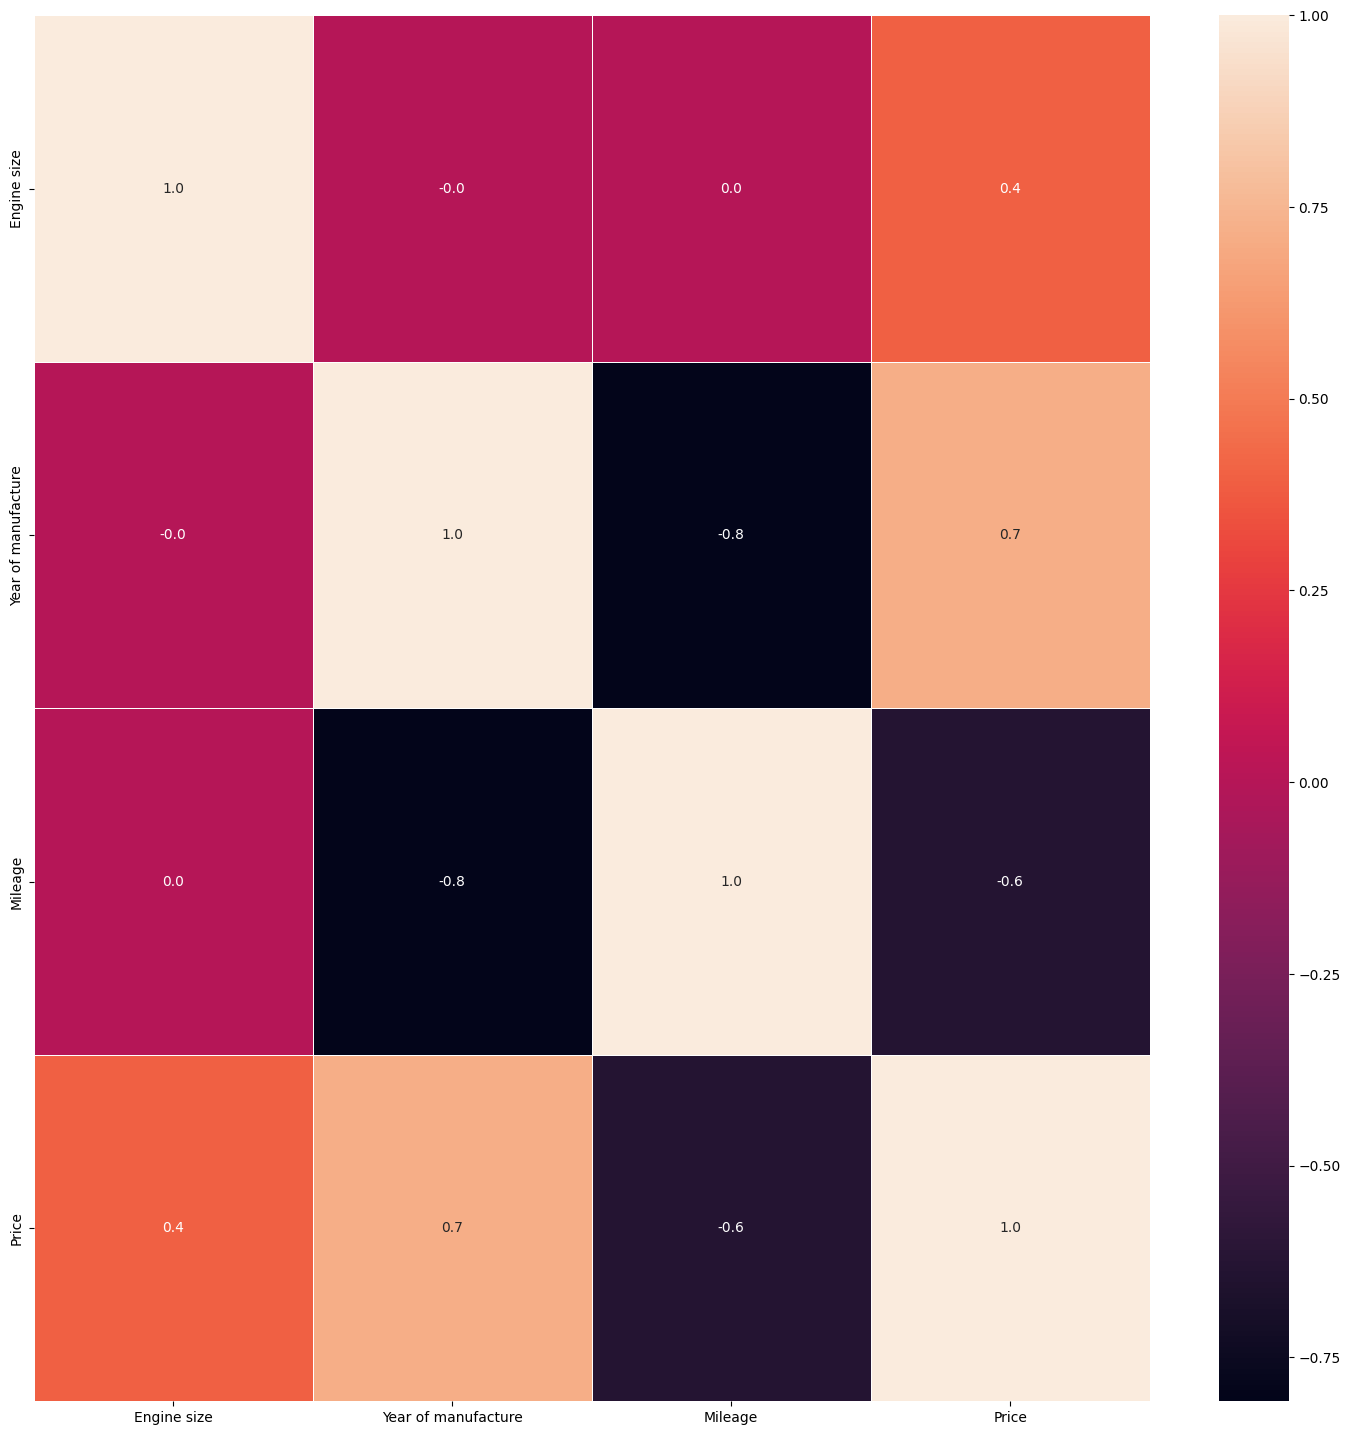

In [ ]:
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data[numerical.columns].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Numerical Data Statisitcs

#### Mean

In [ ]:
# calculate the mean and compare it
for col in numerical.columns:
  numeric_mean = data[col].sum() / data.shape[0]
  print(f"\nCalculated mean is for {col} is {numeric_mean}")
  print("Actual mean is", data[col].mean())


Calculated mean is for Engine size is 1.7730579999999998
Actual mean is 1.7730579999999998

Calculated mean is for Year of manufacture is 2004.20944
Actual mean is 2004.20944

Calculated mean is for Mileage is 112497.3207
Actual mean is 112497.3207

Calculated mean is for Price is 13828.90316
Actual mean is 13828.90316


#### Mode

In [ ]:
# calculate the mode and compare it
for col in numerical.columns:
    frequency = {}

    # count frequencies for this column
    for num in numerical[col]:
        frequency[num] = frequency.get(num, 0) + 1

    # find the max frequency
    max_frequency = max(frequency.values())

    # find all values with that frequency
    numeric_mode = [k for k, v in frequency.items() if v == max_frequency]

    # print results once per column
    print(f"\nCalculated mode for {col}: {numeric_mode}")
    print("Actual mode:", list(numerical[col].mode()))


Calculated mode for Engine size: [1.4]
Actual mode: [1.4]

Calculated mode for Year of manufacture: [2018]
Actual mode: [2018]

Calculated mode for Mileage: [11500]
Actual mode: [11500]

Calculated mode for Price: [1610]
Actual mode: [1610]


#### Median

In [ ]:
# calculate the median and compare it
for col in numerical.columns:
  sorted_values = data.sort_values(col)[col]
  n = sorted_values.shape[0]

  if n % 2 == 0:
      # middle poin of even data
      numeric_median = (sorted_values.iloc[n // 2 - 1] + sorted_values.iloc[n // 2]) / 2
  else:
      # middle point of odd data
      numeric_median = sorted_values.iloc[n // 2]

  print(f"\nCalculated median for {col} is {numeric_median}")
  print("Actual median is", data[col].median())


Calculated median for Engine size is 1.6
Actual median is 1.6

Calculated median for Year of manufacture is 2004.0
Actual median is 2004.0

Calculated median for Mileage is 100987.5
Actual median is 100987.5

Calculated median for Price is 7971.5
Actual median is 7971.5


#### Variance

In [ ]:
# calculate the variance and compare it
for col in numerical.columns:
  # calculate mean
  numeric_mean = data[col].sum() / data.shape[0]
  # calculate variance
  numeric_variance = ((data[col] - numeric_mean) ** 2).sum() / (data.shape[0] - 1)

  print(f"\nCalculated variance for {col} is {numeric_variance:.4f}")
  print(f"Actual variance is {data[col].var():.4f}")


Calculated variance for Engine size is 0.5389
Actual variance is 0.5389

Calculated variance for Year of manufacture is 93.0446
Actual variance is 93.0446

Calculated variance for Mileage is 5131217291.5017
Actual variance is 5131217291.5016

Calculated variance for Price is 269507426.1013
Actual variance is 269507426.1013


#### Standard Devation

In [ ]:
# calculate the standarad devation and compare it
import numpy as np

for col in numerical.columns:
  # calculate mean
  numeric_mean = data[col].sum() / data.shape[0]
  # calculate variance
  numeric_variance = ((data[col] - numeric_mean) ** 2).sum() / (data.shape[0] - 1)
  # calculate std
  numeric_std = np.sqrt(numeric_variance)

  print(f"\nCalculated standard deviation for {col} is {numeric_std:.4f}")
  print(f"Actual standard deviation is {data[col].std():.4f}")


Calculated standard deviation for Engine size is 0.7341
Actual standard deviation is 0.7341

Calculated standard deviation for Year of manufacture is 9.6460
Actual standard deviation is 9.6460

Calculated standard deviation for Mileage is 71632.5156
Actual standard deviation is 71632.5156

Calculated standard deviation for Price is 16416.6813
Actual standard deviation is 16416.6813


#### Range

In [ ]:
# calculate the range
for col in numerical.columns:
  numeric_range = data[col].max() - data[col].min()

  print(f"\nCalculated range for {col} is {numeric_range}")


Calculated range for Engine size is 4.0

Calculated range for Year of manufacture is 38

Calculated range for Mileage is 452907

Calculated range for Price is 168005


#### IQR

In [ ]:
# calculate the outliers using IQR
for col in numerical.columns:
  # define q1 and q3
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)

  # calculate IDP
  IQR = (Q3 - Q1) * 1.5

  # set boundaries for outliers and check if point out of bound
  outliers_df = data[(data[col] < Q1 - IQR) | (data[col] > Q3 + IQR)]
  ouliers_list = []

  # gather outliers in one list
  for outlier in outliers_df[col]:
    ouliers_list.append(outlier)

  print(f"\nCalculated Outliers using IQR for {col} is \n{sorted(list(set(ouliers_list)))}")


Calculated Outliers using IQR for Engine size is 
[3.0, 3.5, 4.0, 4.4, 5.0]

Calculated Outliers using IQR for Year of manufacture is 
[]

Calculated Outliers using IQR for Mileage is 
[315090, 315196, 315291, 315308, 315533, 315643, 315655, 315674, 315758, 315768, 315771, 315772, 315780, 315905, 316038, 316040, 316087, 316092, 316143, 316160, 316171, 316183, 316219, 316231, 316237, 316261, 316328, 316384, 316397, 316535, 316549, 316594, 316666, 316672, 316922, 316977, 317073, 317146, 317183, 317242, 317304, 317372, 317468, 317531, 317546, 317595, 317629, 317754, 318043, 318071, 318153, 318196, 318219, 318228, 318300, 318316, 318343, 318549, 318591, 318636, 318772, 318837, 319116, 319196, 319288, 319309, 319318, 319446, 319585, 319693, 319704, 319717, 319718, 319745, 319817, 319974, 320019, 320043, 320274, 320312, 320346, 320424, 320636, 320710, 320711, 320779, 320918, 320937, 320993, 321029, 321290, 321660, 321685, 321753, 321848, 321985, 322022, 322103, 322125, 322154, 322289, 32239

Plot to check

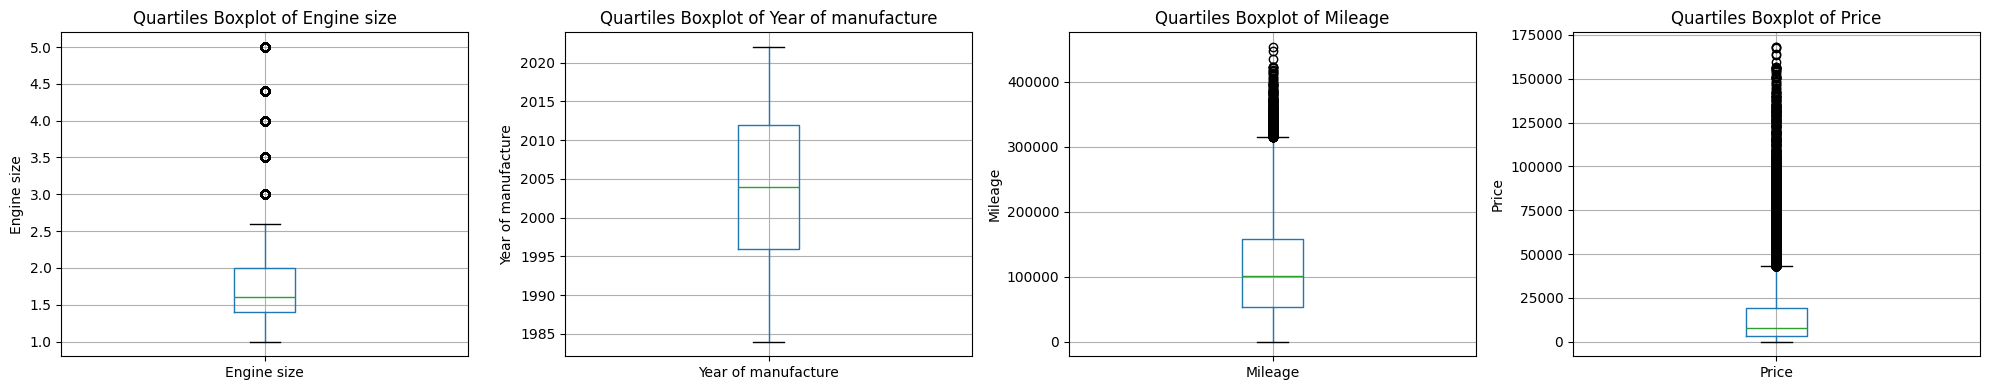

In [ ]:
# show plots in one row for numerical columns
fig, axes = plt.subplots(1, len(numerical.columns), figsize=(5 * len(numerical.columns), 4))

# ploting using box plot
for ax, col in zip(axes, numerical.columns):
    numerical.boxplot(column=col, ax=ax)
    ax.set_title(f"Quartiles Boxplot of {col}")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

#### Z-Score

In [ ]:
# calculate the outliers using z-score
for col in numerical.columns:
  # calculate mean
  numeric_mean = data[col].sum() / data.shape[0]
  # calculate variance
  numeric_variance = ((data[col] - numeric_mean) ** 2).sum() / (data.shape[0] - 1)
  # calculate std
  numeric_std = np.sqrt(numeric_variance)
  # calculate z-core
  z_score = (data[col] - numeric_mean) / numeric_std

  # check if point far from z-score by 4 stds
  outliers_df1 = data[z_score.abs() > 4]
  ouliers_listz = []

  # gather outliers in one list
  for outlier in outliers_df1[col]:
    ouliers_listz.append(outlier)

  print(f"\nCalculated Outliers using Z-Score for {col} is \n{sorted(list(set(ouliers_listz)))}")


Calculated Outliers using Z-Score for Engine size is 
[5.0]

Calculated Outliers using Z-Score for Year of manufacture is 
[]

Calculated Outliers using Z-Score for Mileage is 
[400992, 402743, 405205, 405549, 408775, 412764, 413326, 413340, 416143, 417162, 417511, 421979, 422895, 423053, 423108, 434923, 446897, 453537]

Calculated Outliers using Z-Score for Price is 
[79526, 79750, 79790, 79845, 79959, 80167, 80214, 80293, 80346, 80378, 80387, 80421, 80541, 80569, 80576, 80652, 80687, 80781, 80831, 80901, 80986, 81080, 81104, 81253, 81271, 81290, 81405, 81448, 81582, 81585, 81629, 81652, 81725, 81758, 82031, 82034, 82135, 82260, 82391, 82475, 82526, 82584, 82709, 82723, 82800, 82873, 83018, 83185, 83194, 83241, 83299, 83326, 83331, 83387, 83464, 83473, 83491, 83493, 83715, 83835, 83853, 83905, 84047, 84080, 84090, 84135, 84155, 84169, 84298, 84344, 84380, 84413, 84591, 84613, 84637, 84655, 84714, 84819, 84841, 84916, 85043, 85073, 85097, 85105, 85145, 85160, 85248, 85330, 85365, 8536

Plot to check

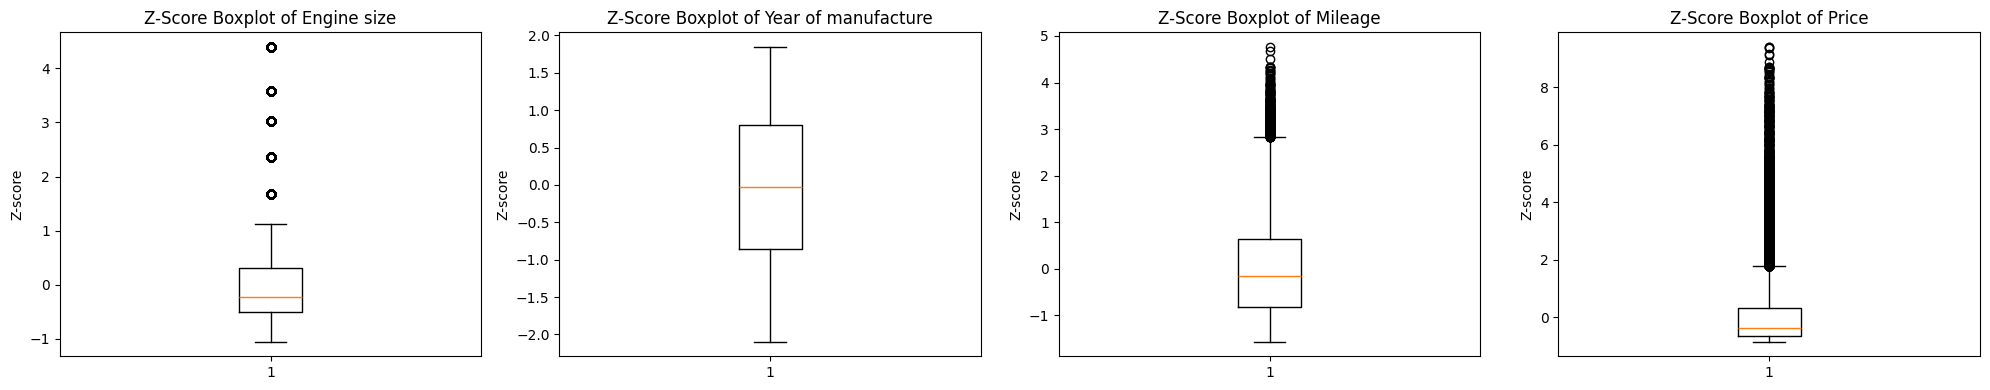

In [ ]:
# Actual z-score
zscored = numerical.apply(zscore)

# show plots in one row for numerical columns
fig, axes = plt.subplots(1, len(zscored.columns), figsize=(5 * len(zscored.columns), 4))

for ax, col in zip(axes, zscored.columns):
    ax.boxplot(zscored[col], vert=True)
    ax.set_title(f"Z-Score Boxplot of {col}")
    ax.set_ylabel("Z-score")

plt.tight_layout()
plt.show()

## Categorical Data Statistics

In [ ]:
# calculate the mode and compare it
for col in catigorical.columns:
    frequency = {}

    # count frequencies for this column
    for cat in catigorical[col]:
        frequency[cat] = frequency.get(cat, 0) + 1

    # find the max frequency
    max_frequency = max(frequency.values())

    # find all values with that frequency
    catigorical_mode = [k for k, v in frequency.items() if v == max_frequency]

    # print results once per column
    print(f"\nCalculated mode for {col}: {catigorical_mode}")
    print("Actual mode:", list(catigorical[col].mode()))


Calculated mode for Manufacturer: ['Ford']
Actual mode: ['Ford']

Calculated mode for Model: ['Mondeo']
Actual mode: ['Mondeo']

Calculated mode for Fuel type: ['Petrol']
Actual mode: ['Petrol']


# Missing value

In [ ]:
missing_value=data.isna().sum()
print(missing_value)

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64


# Drop duplicated

In [ ]:
# Duplicated rows (could indicate over-sampling)
print(data.duplicated().sum())

12


In [ ]:
import pandas as pd

data1=data.drop_duplicates()

In [ ]:
# Duplicated rows (could indicate over-sampling)
print(data1.duplicated().sum())

0


# Shape

In [ ]:
data1.shape

(49988, 7)

#### Visualization

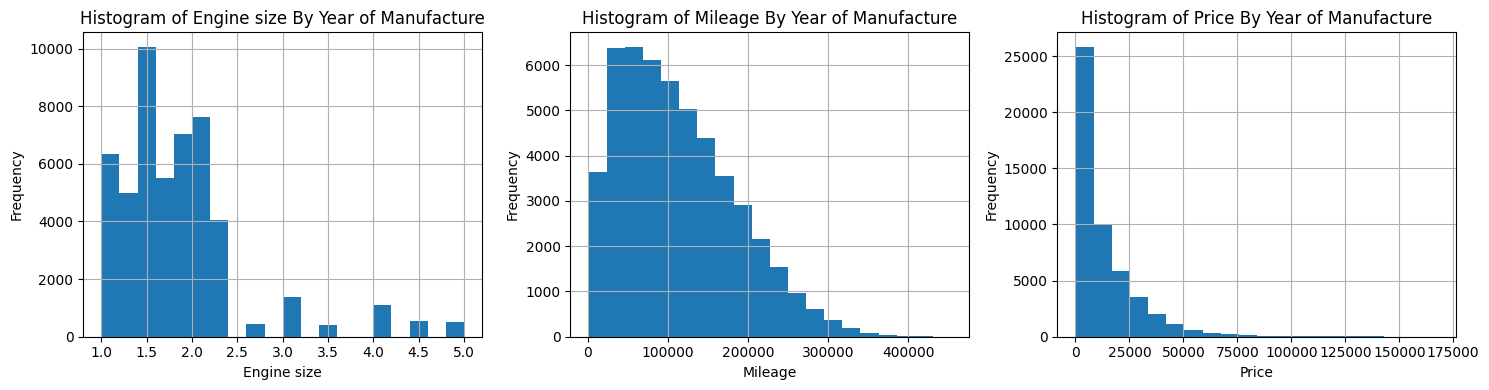

In [ ]:
# numerical columns compared to Year of Manufacture
fig, axes = plt.subplots(1, len(numerical.columns)-1, figsize=(5 * (len(numerical.columns)-1), 4))

# skip column at index 1 (Year of Manufacture)
cols_to_plot = [col for idx, col in enumerate(numerical.columns) if idx != 1]

for ax, col in zip(axes, cols_to_plot):
    numerical[col].hist(ax=ax, bins=20)
    ax.set_title(f"Histogram of {col} By Year of Manufacture")
    ax.set_ylabel("Frequency")
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()


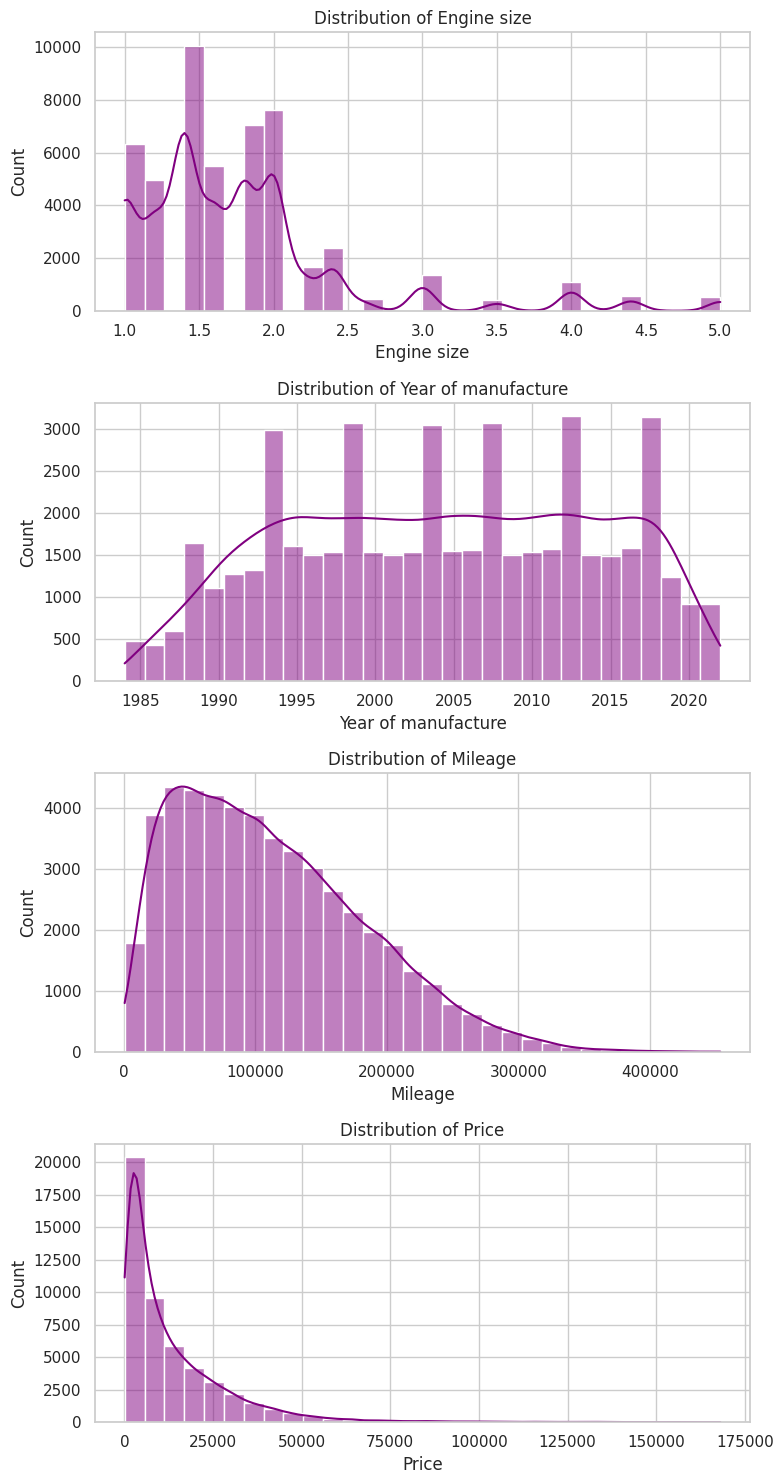

In [ ]:
# Histograms for all numerical features
fig, axes = plt.subplots(len(numerical.columns), 1, figsize=(8, 15))

for ax, col in zip(axes, numerical.columns):
    sns.histplot(data[col], bins=30, kde=True, ax=ax, color="purple")
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


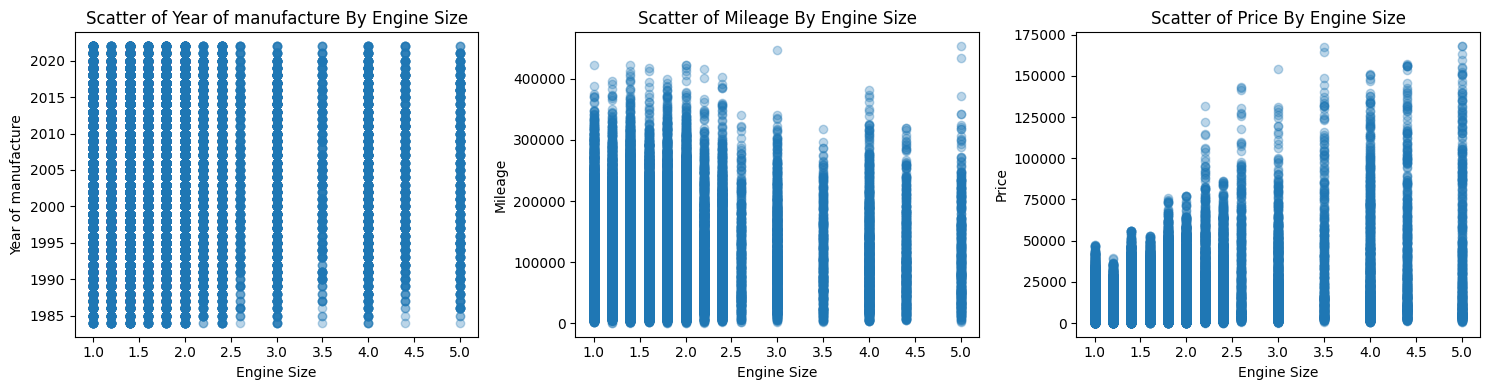

In [ ]:
# numerical columns compared to Engine Size
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(5 * len(cols_to_plot), 4))

# # skip column at index 0 (Engine Size)
cols_to_plot = [col for idx, col in enumerate(numerical.columns) if idx != 0]

# Plot each column
for ax, col in zip(axes, cols_to_plot):
    ax.scatter(numerical["Engine size"], numerical[col], alpha=0.3)
    ax.set_title(f"Scatter of {col} By Engine Size")
    ax.set_xlabel("Engine Size")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

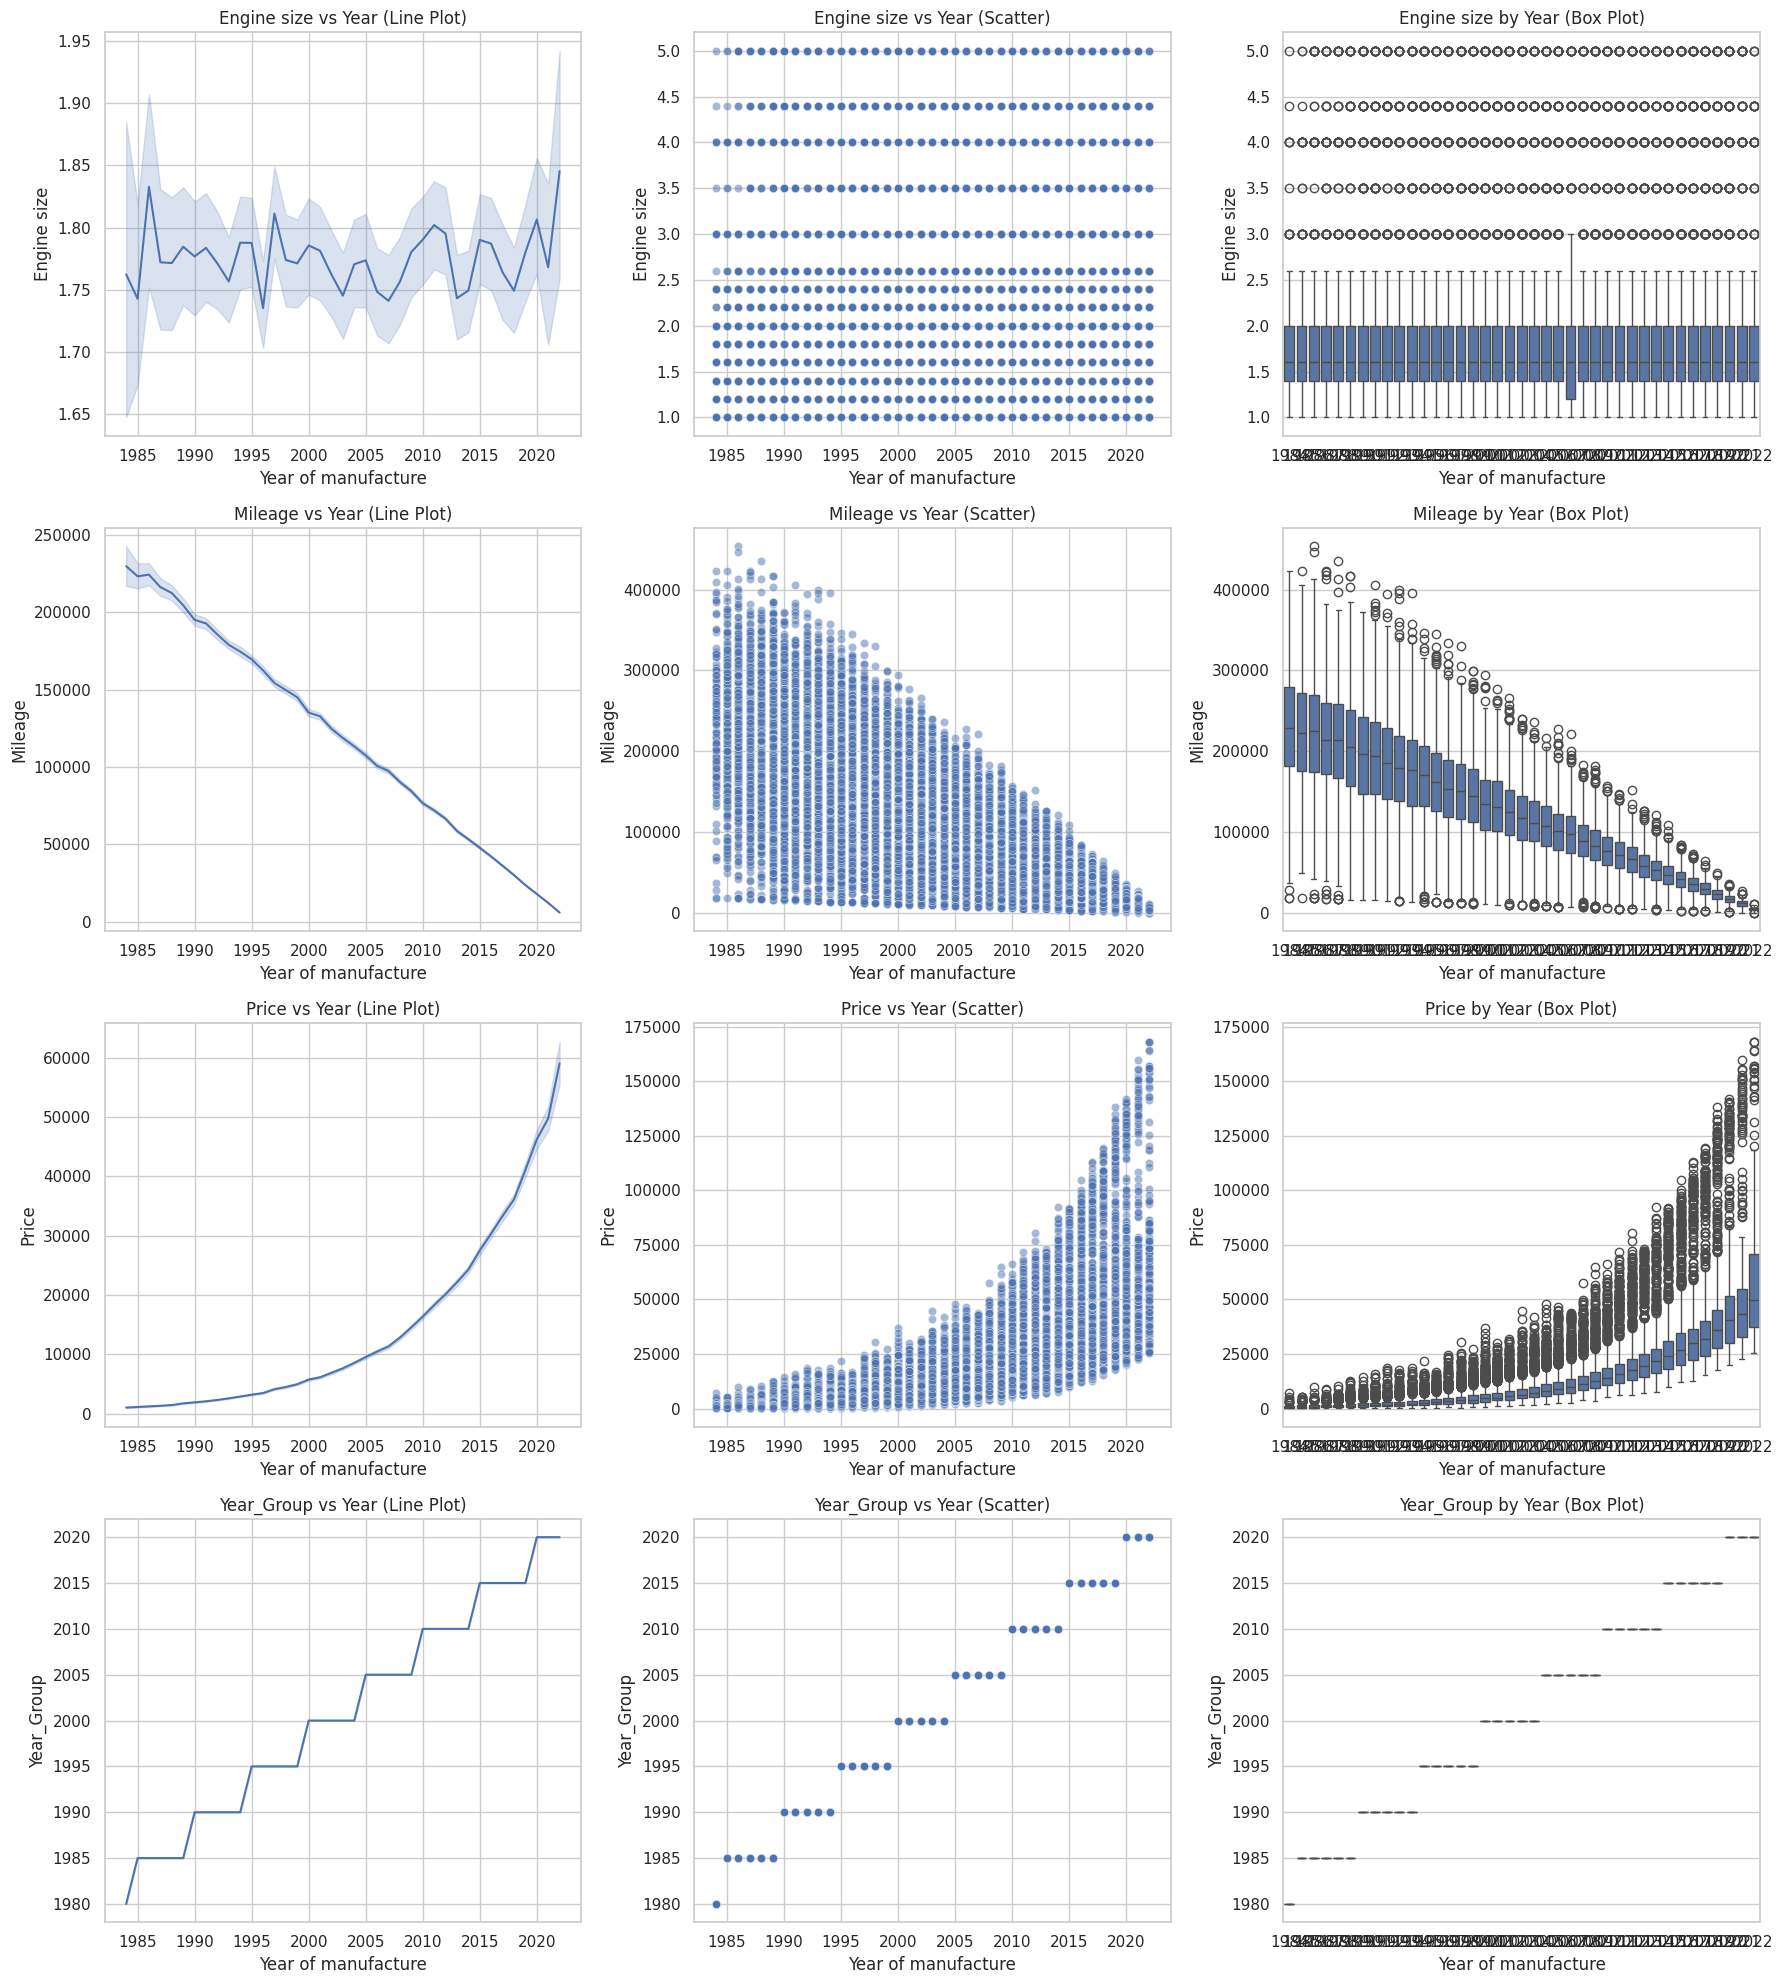

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: assuming df is your DataFrame and 'Year of manufacture' is in it
numerical = data1.select_dtypes(include='number')  # all numerical columns

# Get column names excluding Year of Manufacture (usually index 1)
cols_to_plot = [col for col in numerical.columns if col != 'Year of manufacture']

# Set seaborn theme
sns.set(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(len(cols_to_plot), 3, figsize=(18, 5 * len(cols_to_plot)))

for i, col in enumerate(cols_to_plot):
    # Line Plot (Year vs Column Mean)
    sns.lineplot(data=data1, x='Year of manufacture', y=col, ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} vs Year (Line Plot)")

    # Scatter Plot
    sns.scatterplot(data=data1, x='Year of manufacture', y=col, ax=axes[i, 1], alpha=0.5)
    axes[i, 1].set_title(f"{col} vs Year (Scatter)")

    # Box Plot
    sns.boxplot(data=data1, x='Year of manufacture', y=col, ax=axes[i, 2])
    axes[i, 2].set_title(f"{col} by Year (Box Plot)")



# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipython-input-493692991.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data1, x=year_col, y='Price', hue=col, ci=None, ax=axes[i, 1])
/tmp/ipython-input-493692991.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data1, x=year_col, y='Price', hue=col, ci=None, ax=axes[i, 1])
/tmp/ipython-input-493692991.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data1, x=year_col, y='Price', hue=col, ci=None, ax=axes[i, 1])
/tmp/ipython-input-493692991.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data1, x=year_col, y='Price', hue=col, ci=None, ax=axes[i, 1])


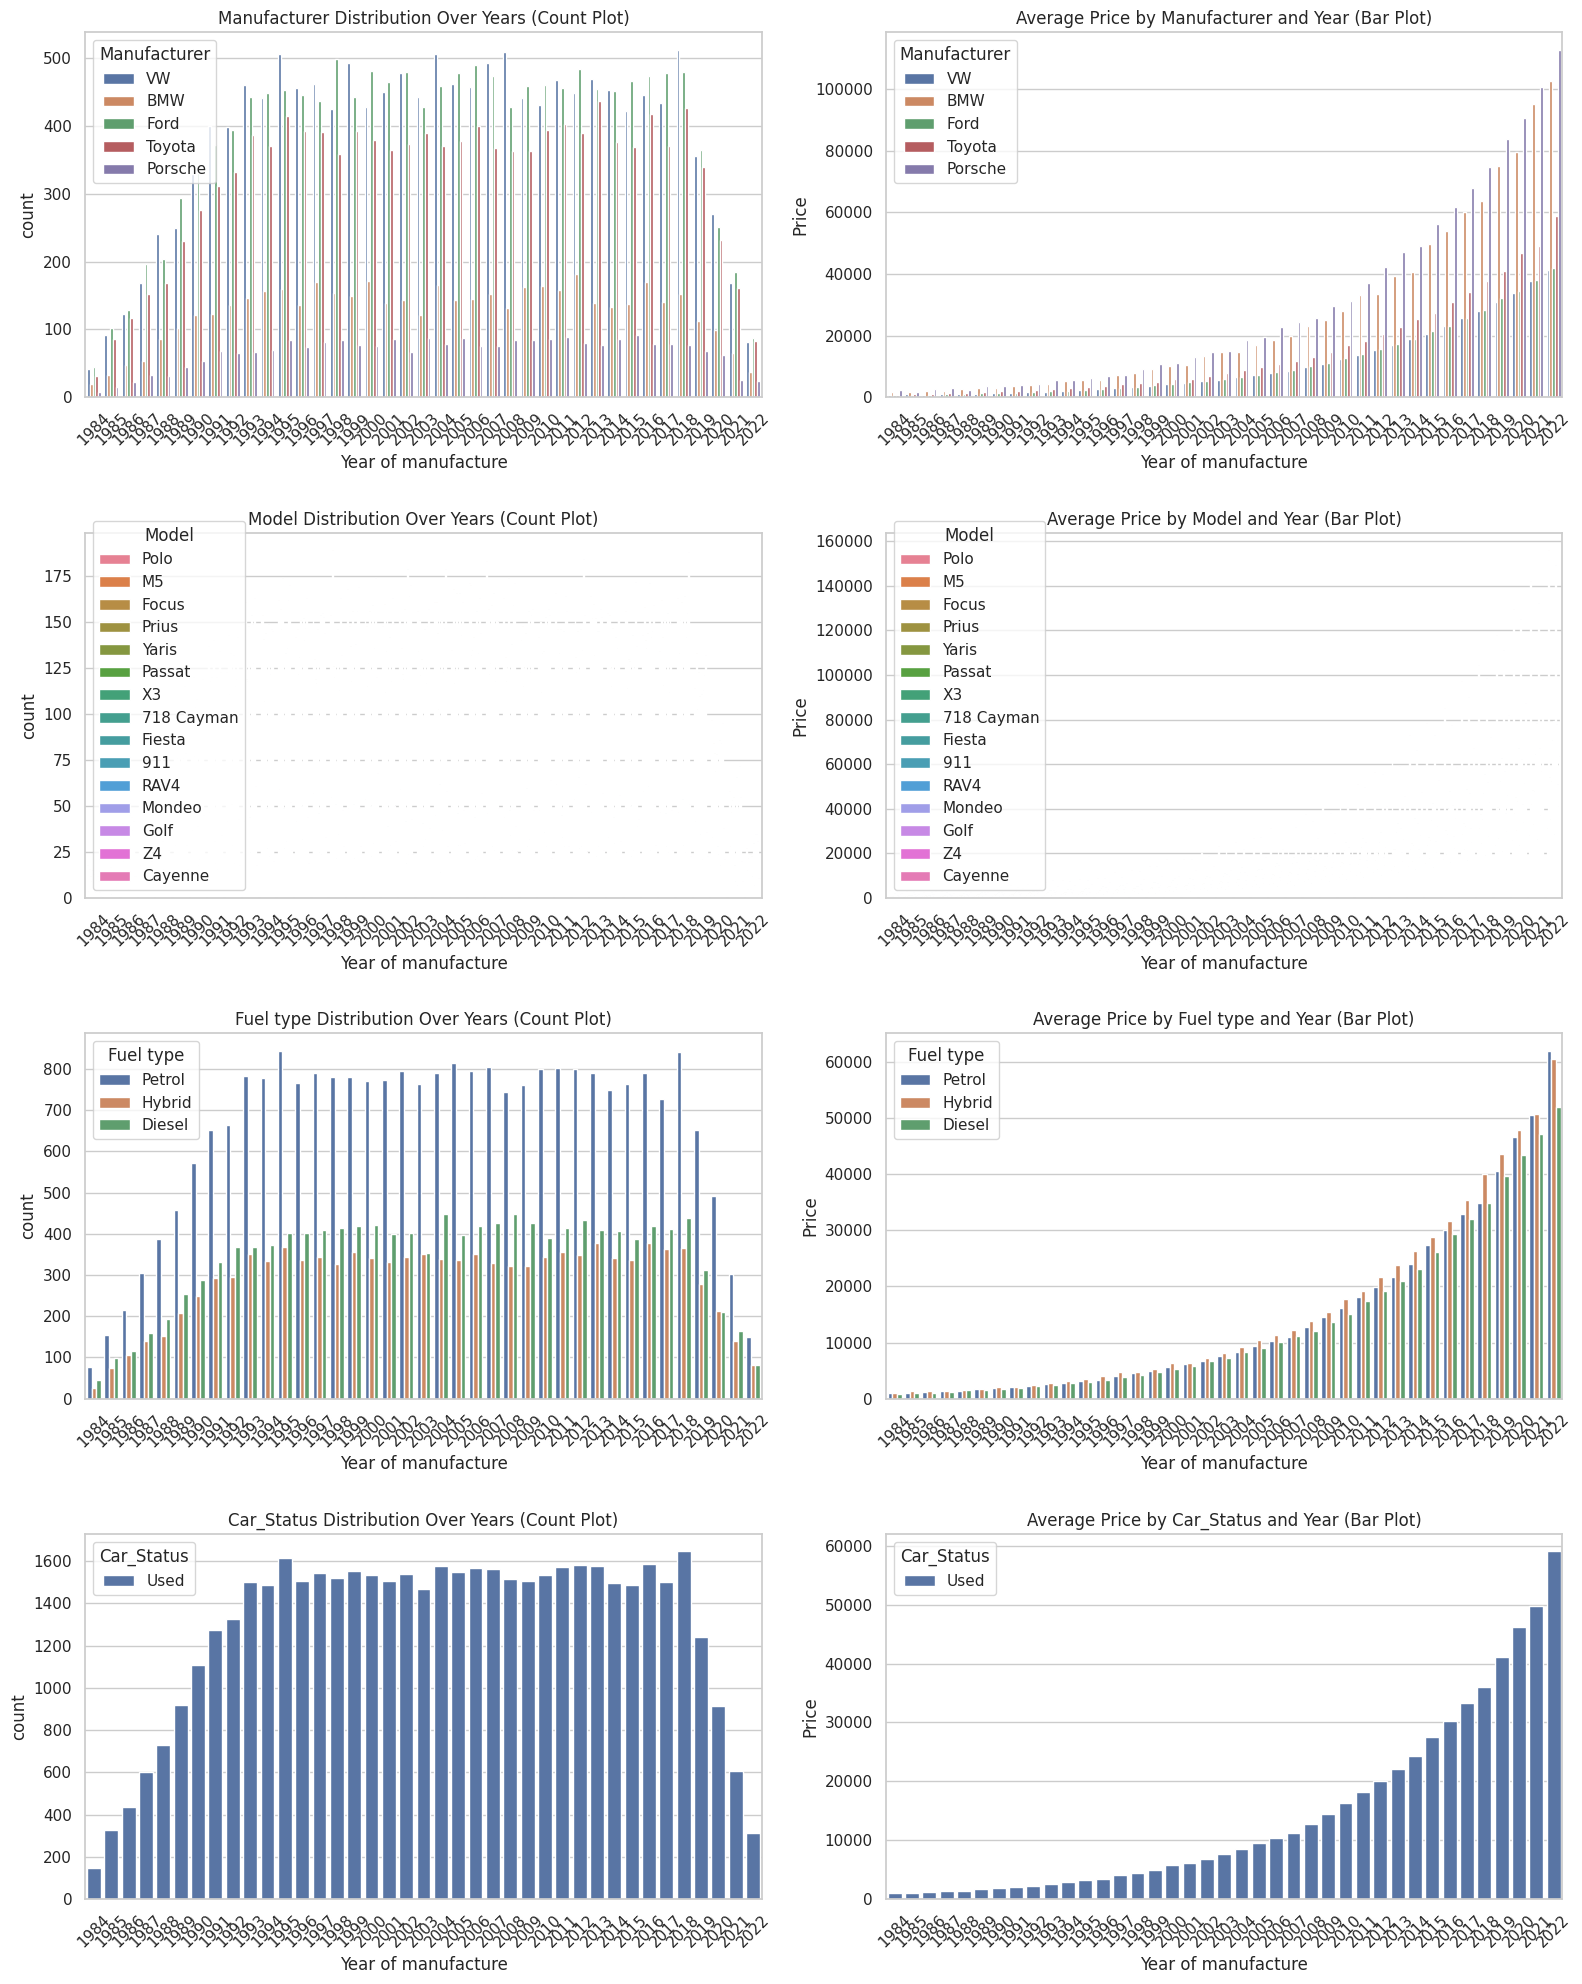

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style='whitegrid')

# Select categorical columns
categorical = data1.select_dtypes(include='object')  # or include='category'
year_col = 'Year of manufacture'

# Set up subplots
fig, axes = plt.subplots(len(categorical.columns), 2, figsize=(16, 5 * len(categorical.columns)))

for i, col in enumerate(categorical.columns):
    # 1. Count plot (how many cars of each category per year)
    sns.countplot(data=data1, x=year_col, hue=col, ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} Distribution Over Years (Count Plot)")
    axes[i, 0].tick_params(axis='x', rotation=45)

    # 2. Bar plot (average price or mileage per category per year)
    # You can change 'Price' to another numerical column
    sns.barplot(data=data1, x=year_col, y='Price', hue=col, ci=None, ax=axes[i, 1])
    axes[i, 1].set_title(f"Average Price by {col} and Year (Bar Plot)")
    axes[i, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
data1 = data1.drop(columns=['Car_Status'])


/tmp/ipython-input-3862574700.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data1, x=year_col, y='Price', hue=col, ci=None, ax=axes[i, 1])
/tmp/ipython-input-3862574700.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data1, x=year_col, y='Price', hue=col, ci=None, ax=axes[i, 1])
/tmp/ipython-input-3862574700.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data1, x=year_col, y='Price', hue=col, ci=None, ax=axes[i, 1])


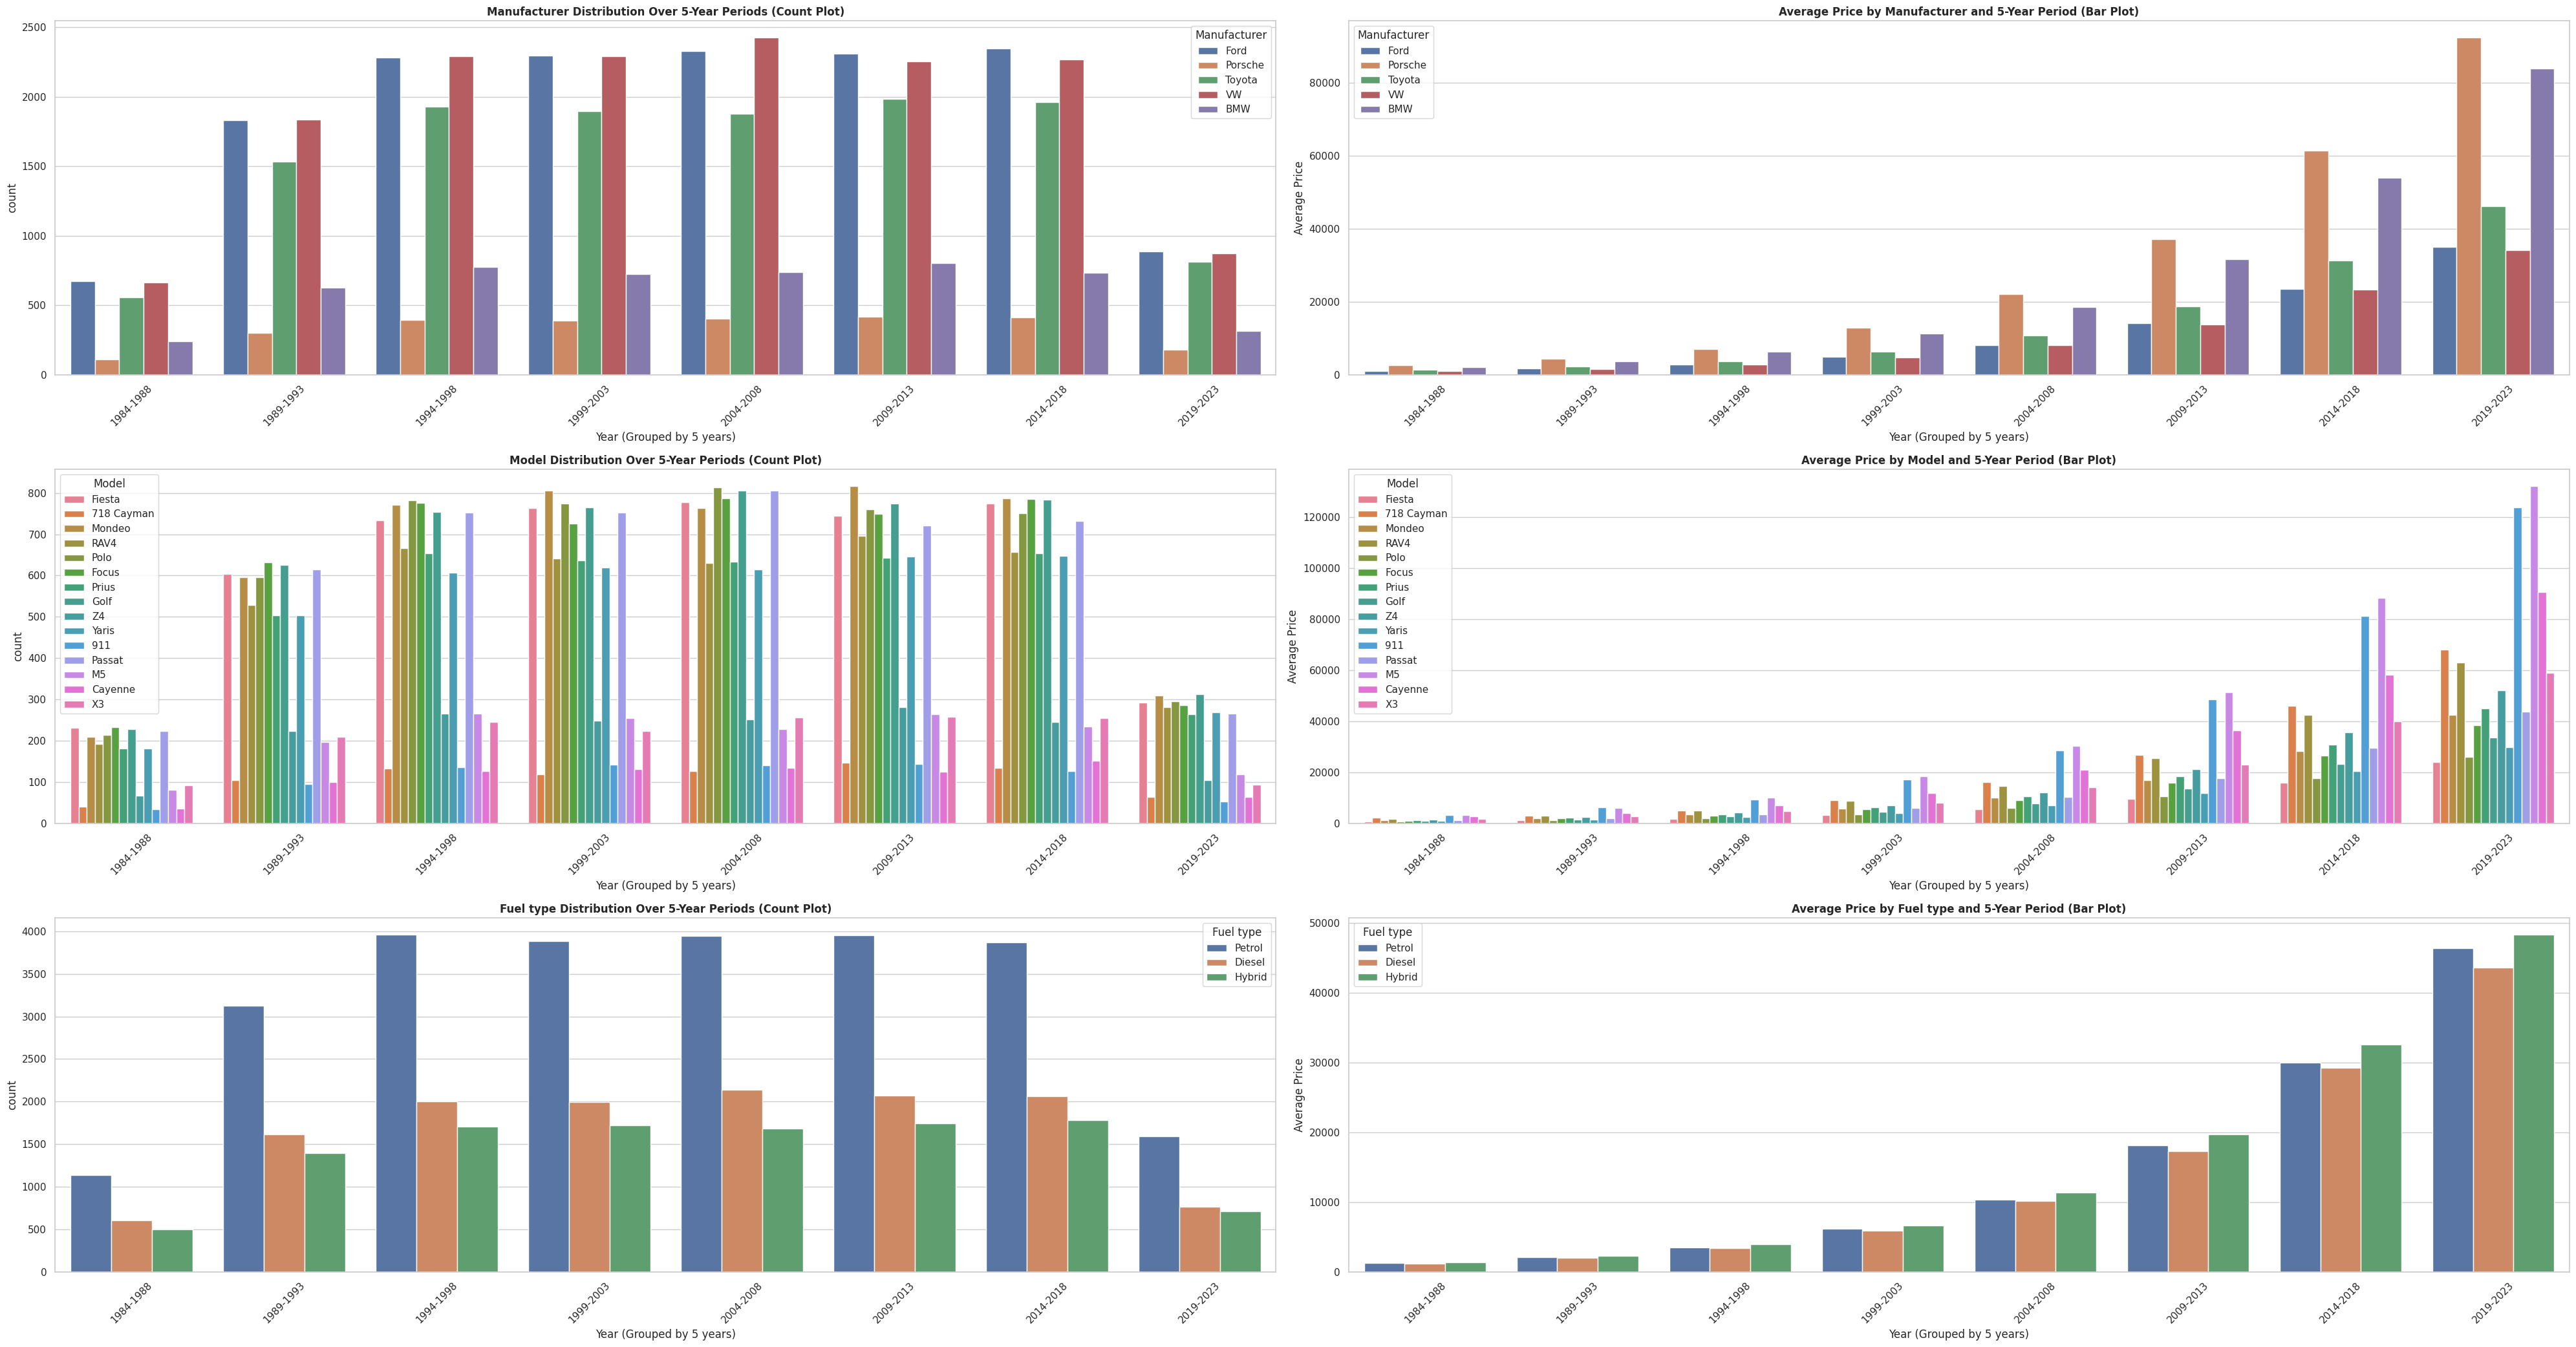

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set visual style
sns.set(style='whitegrid')

# Create a new column for 5-year bins
data1['Year_bin'] = pd.cut(
    data1['Year of manufacture'],
    bins=range(data1['Year of manufacture'].min(), data1['Year of manufacture'].max() + 5, 5),
    right=False,
    labels=[f"{y}-{y+4}" for y in range(data1['Year of manufacture'].min(), data1['Year of manufacture'].max(), 5)]
)

# Select categorical columns
categorical = data1.select_dtypes(include='object')  # or include='category'
year_col = 'Year_bin'  # use the new grouped column

# Set up subplots (2 plots per categorical column)
fig, axes = plt.subplots(len(categorical.columns), 2, figsize=(40, 7 * len(categorical.columns)))

for i, col in enumerate(categorical.columns):
    # 1. Count plot (how many cars of each category per 5-year bin)
    sns.countplot(data=data1, x=year_col, hue=col, ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} Distribution Over 5-Year Periods (Count Plot)", fontsize=12, fontweight="bold")
    axes[i, 0].tick_params(axis='x', rotation=45)
    axes[i, 0].set_xlabel("Year (Grouped by 5 years)")

    # 2. Bar plot (average price per category per 5-year bin)
    sns.barplot(data=data1, x=year_col, y='Price', hue=col, ci=None, ax=axes[i, 1])
    axes[i, 1].set_title(f"Average Price by {col} and 5-Year Period (Bar Plot)", fontsize=12, fontweight="bold")
    axes[i, 1].tick_params(axis='x', rotation=45)
    axes[i, 1].set_xlabel("Year (Grouped by 5 years)")
    axes[i, 1].set_ylabel("Average Price")

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipython-input-444371992.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = data1.groupby([year_col, col]).size().reset_index(name='Count')
/tmp/ipython-input-444371992.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = data1.groupby([year_col, col])['Price'].mean().reset_index()
/tmp/ipython-input-444371992.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = data1.groupby([

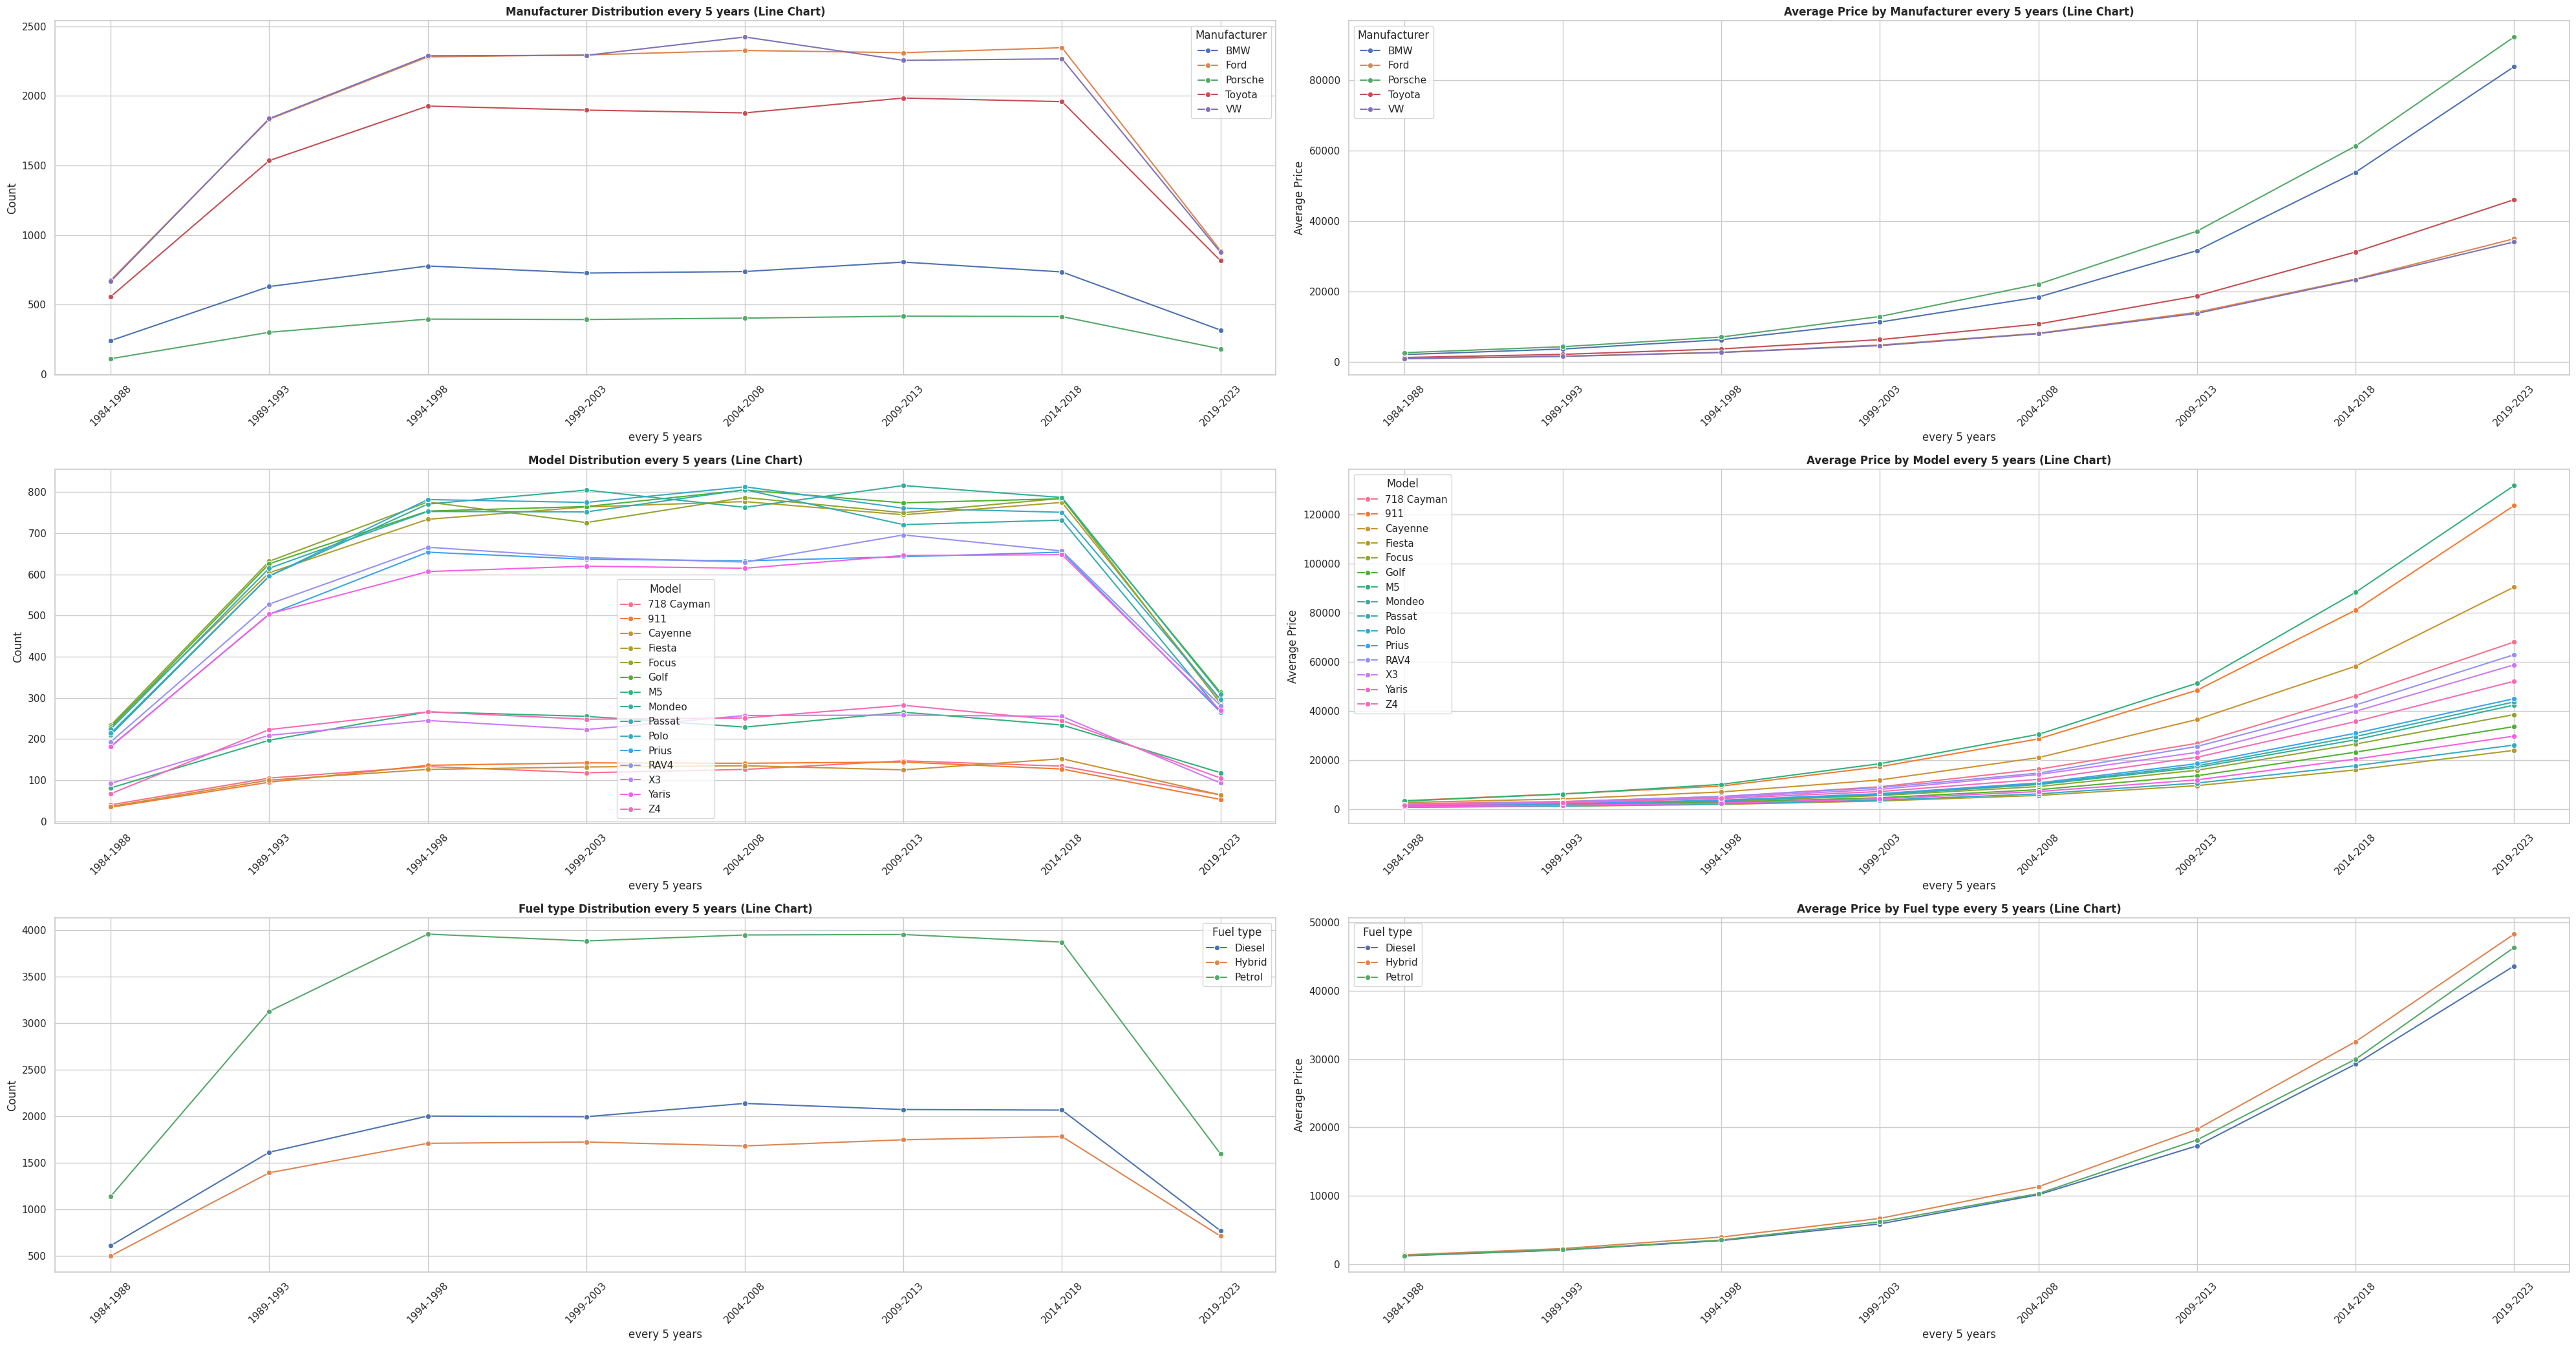

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set visual style
sns.set(style='whitegrid')

# Create a new column for 5-year bins
data1['Years of manufacture'] = pd.cut(
    data1['Year of manufacture'],
    bins=range(data1['Year of manufacture'].min(), data1['Year of manufacture'].max() + 5, 5),
    right=False,
    labels=[f"{y}-{y+4}" for y in range(data1['Year of manufacture'].min(), data1['Year of manufacture'].max(), 5)]
)

# Select categorical columns, optionally exclude 'Used/New Car' if needed
categorical = data1.select_dtypes(include='object').drop(columns=['Used/New Car'], errors='ignore')
year_col = 'Years of manufacture'

# Set up subplots (2 plots per categorical column)
fig, axes = plt.subplots(len(categorical.columns), 2, figsize=(40, 7 * len(categorical.columns)))

for i, col in enumerate(categorical.columns):
    # 1. Line plot: count of cars per category per 5-year bin
    count_data = data1.groupby([year_col, col]).size().reset_index(name='Count')
    sns.lineplot(data=count_data, x=year_col, y='Count', hue=col, marker='o', ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} Distribution every 5 years (Line Chart)", fontsize=12, fontweight="bold")
    axes[i, 0].tick_params(axis='x', rotation=45)
    axes[i, 0].set_xlabel("every 5 years")
    axes[i, 0].set_ylabel("Count")

    # 2. Line plot: average price per category per 5-year bin
    avg_price = data1.groupby([year_col, col])['Price'].mean().reset_index()
    sns.lineplot(data=avg_price, x=year_col, y='Price', hue=col, marker='o', ax=axes[i, 1])
    axes[i, 1].set_title(f"Average Price by {col} every 5 years (Line Chart)", fontsize=12, fontweight="bold")
    axes[i, 1].tick_params(axis='x', rotation=45)
    axes[i, 1].set_xlabel("every 5 years")
    axes[i, 1].set_ylabel("Average Price")

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipython-input-2951269013.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data1, x=price_col, y='Mileage', hue=col, ci=None, ax=axes[i, 1])
/tmp/ipython-input-2951269013.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data1, x=price_col, y='Mileage', hue=col, ci=None, ax=axes[i, 1])
/tmp/ipython-input-2951269013.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data1, x=price_col, y='Mileage', hue=col, ci=None, ax=axes[i, 1])


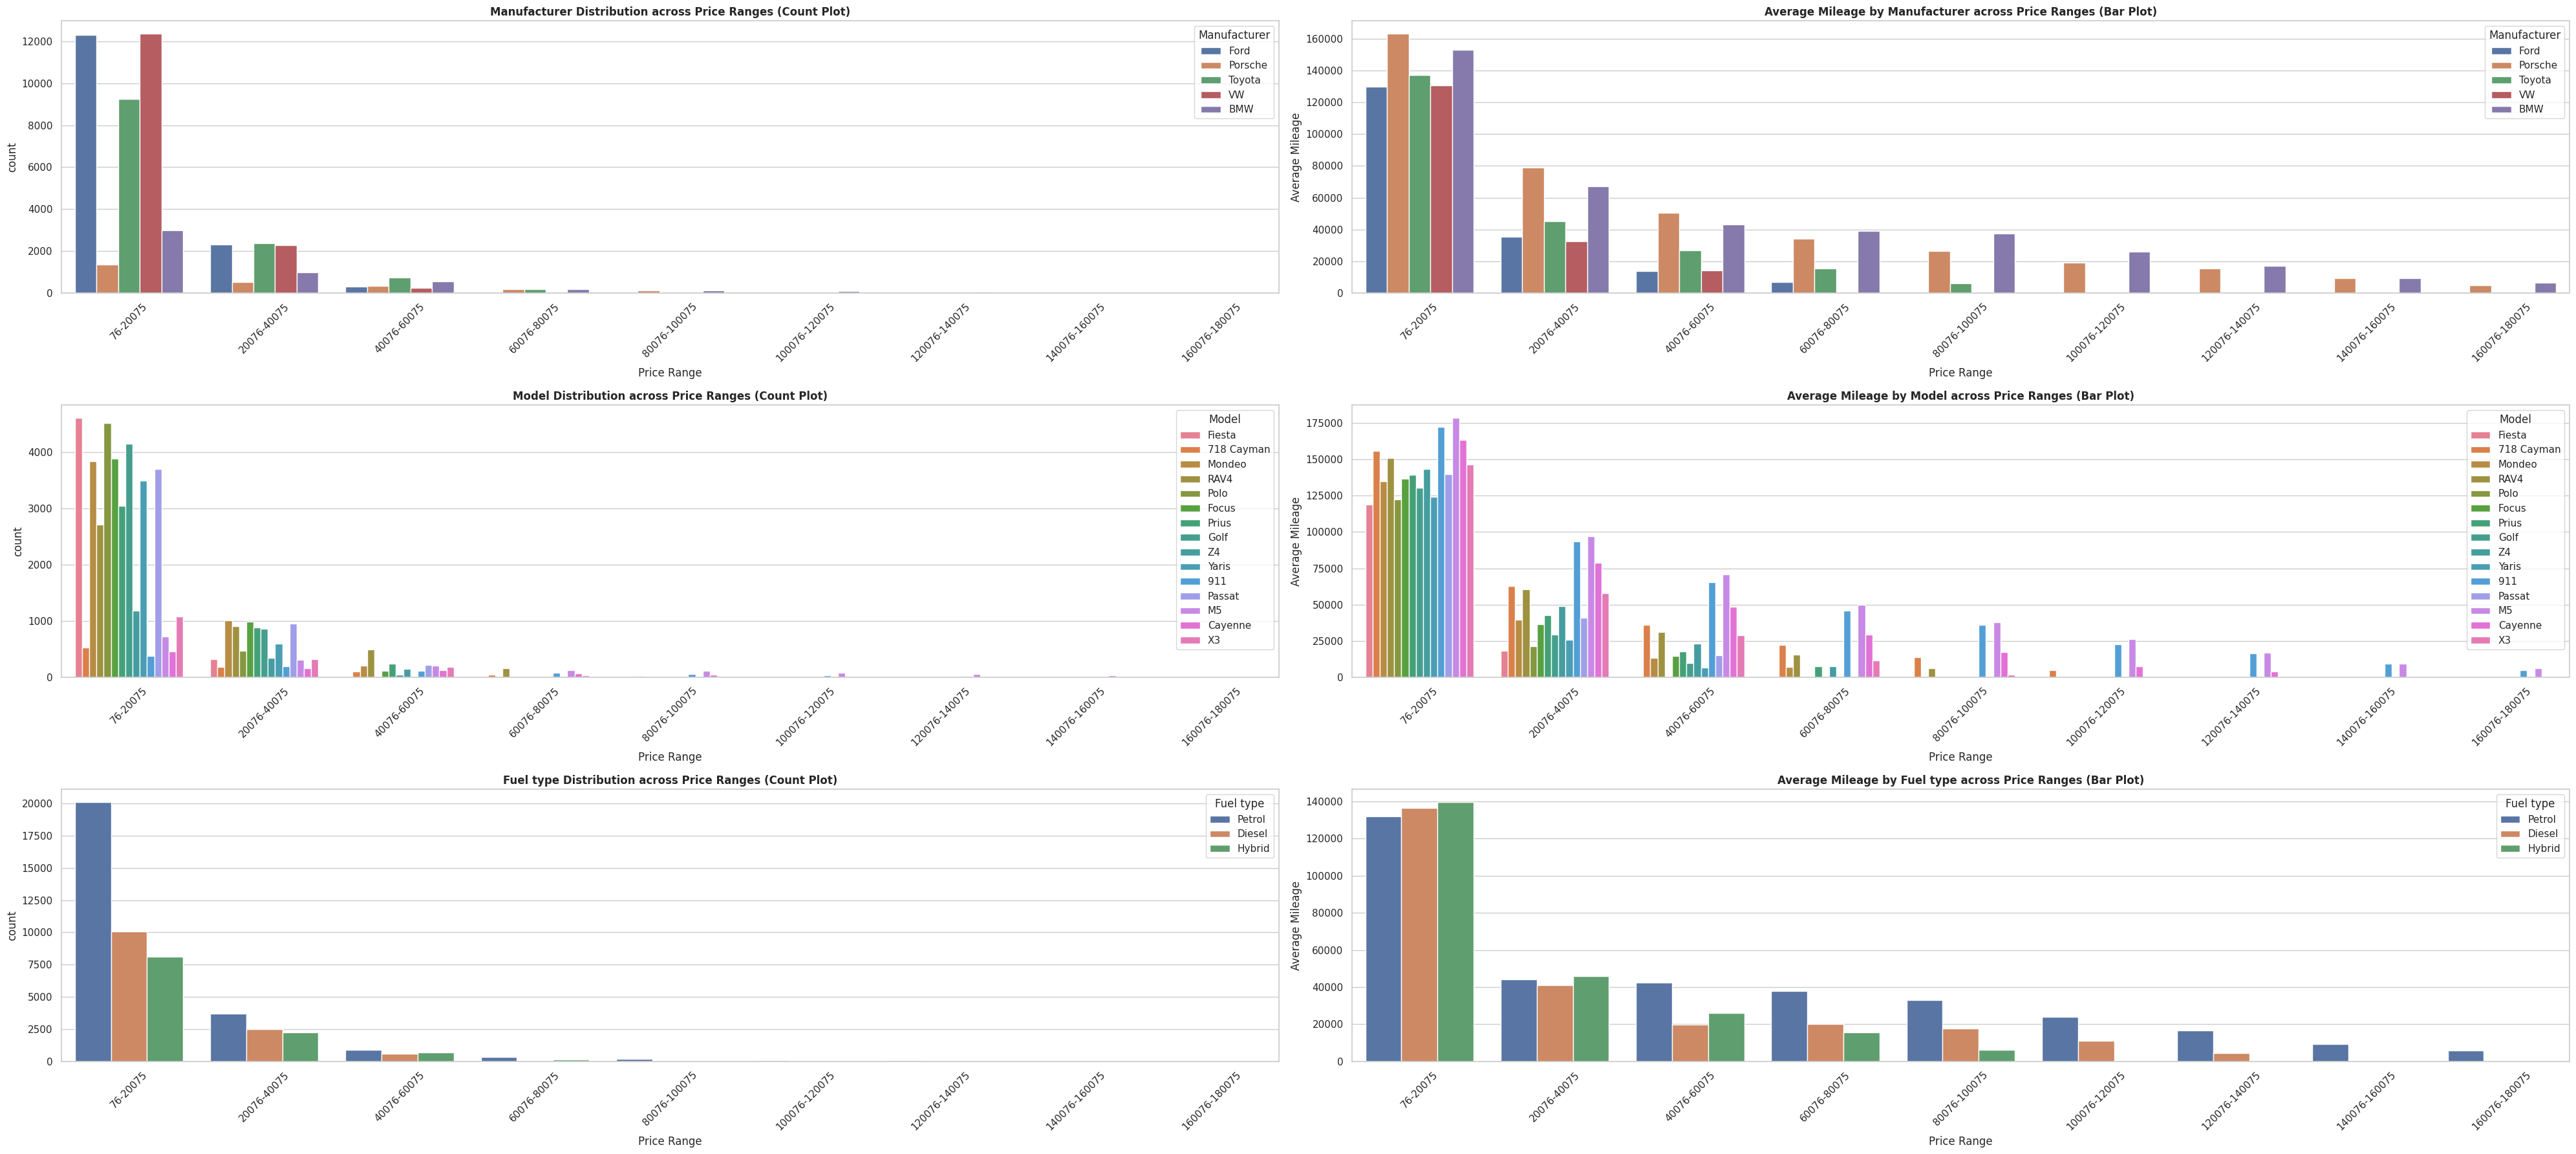

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set visual style
sns.set(style='whitegrid')

# Create a new column for price bins (grouping prices)
# Adjust bin size based on your data range (e.g., 5000 or 10000)
bin_size = 20000
data1['Price_Range'] = pd.cut(
    data1['Price'],
    bins=range(int(data1['Price'].min()), int(data1['Price'].max()) + bin_size, bin_size),
    right=False,
    labels=[f"{p}-{p+bin_size-1}" for p in range(int(data1['Price'].min()), int(data1['Price'].max()), bin_size)]
)

# Select categorical columns
categorical = data1.select_dtypes(include='object')
price_col = 'Price_Range'  # use the new grouped column for price

# Set up subplots
fig, axes = plt.subplots(len(categorical.columns), 2, figsize=(40, 6 * len(categorical.columns)))

for i, col in enumerate(categorical.columns):
    # 1. Count plot: how many cars of each category per price range
    sns.countplot(data=data1, x=price_col, hue=col, ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} Distribution across Price Ranges (Count Plot)", fontsize=12, fontweight="bold")
    axes[i, 0].tick_params(axis='x', rotation=45)
    axes[i, 0].set_xlabel("Price Range")

    # 2. Bar plot: average mileage (or other numerical column) per category per price range
    sns.barplot(data=data1, x=price_col, y='Mileage', hue=col, ci=None, ax=axes[i, 1])
    axes[i, 1].set_title(f"Average Mileage by {col} across Price Ranges (Bar Plot)", fontsize=12, fontweight="bold")
    axes[i, 1].tick_params(axis='x', rotation=45)
    axes[i, 1].set_xlabel("Price Range")
    axes[i, 1].set_ylabel("Average Mileage")

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipython-input-48718871.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = data1.groupby([price_col, col]).size().reset_index(name='Count')
/tmp/ipython-input-48718871.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_mileage = data1.groupby([price_col, col])['Mileage'].mean().reset_index()
/tmp/ipython-input-48718871.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = data1.groupb

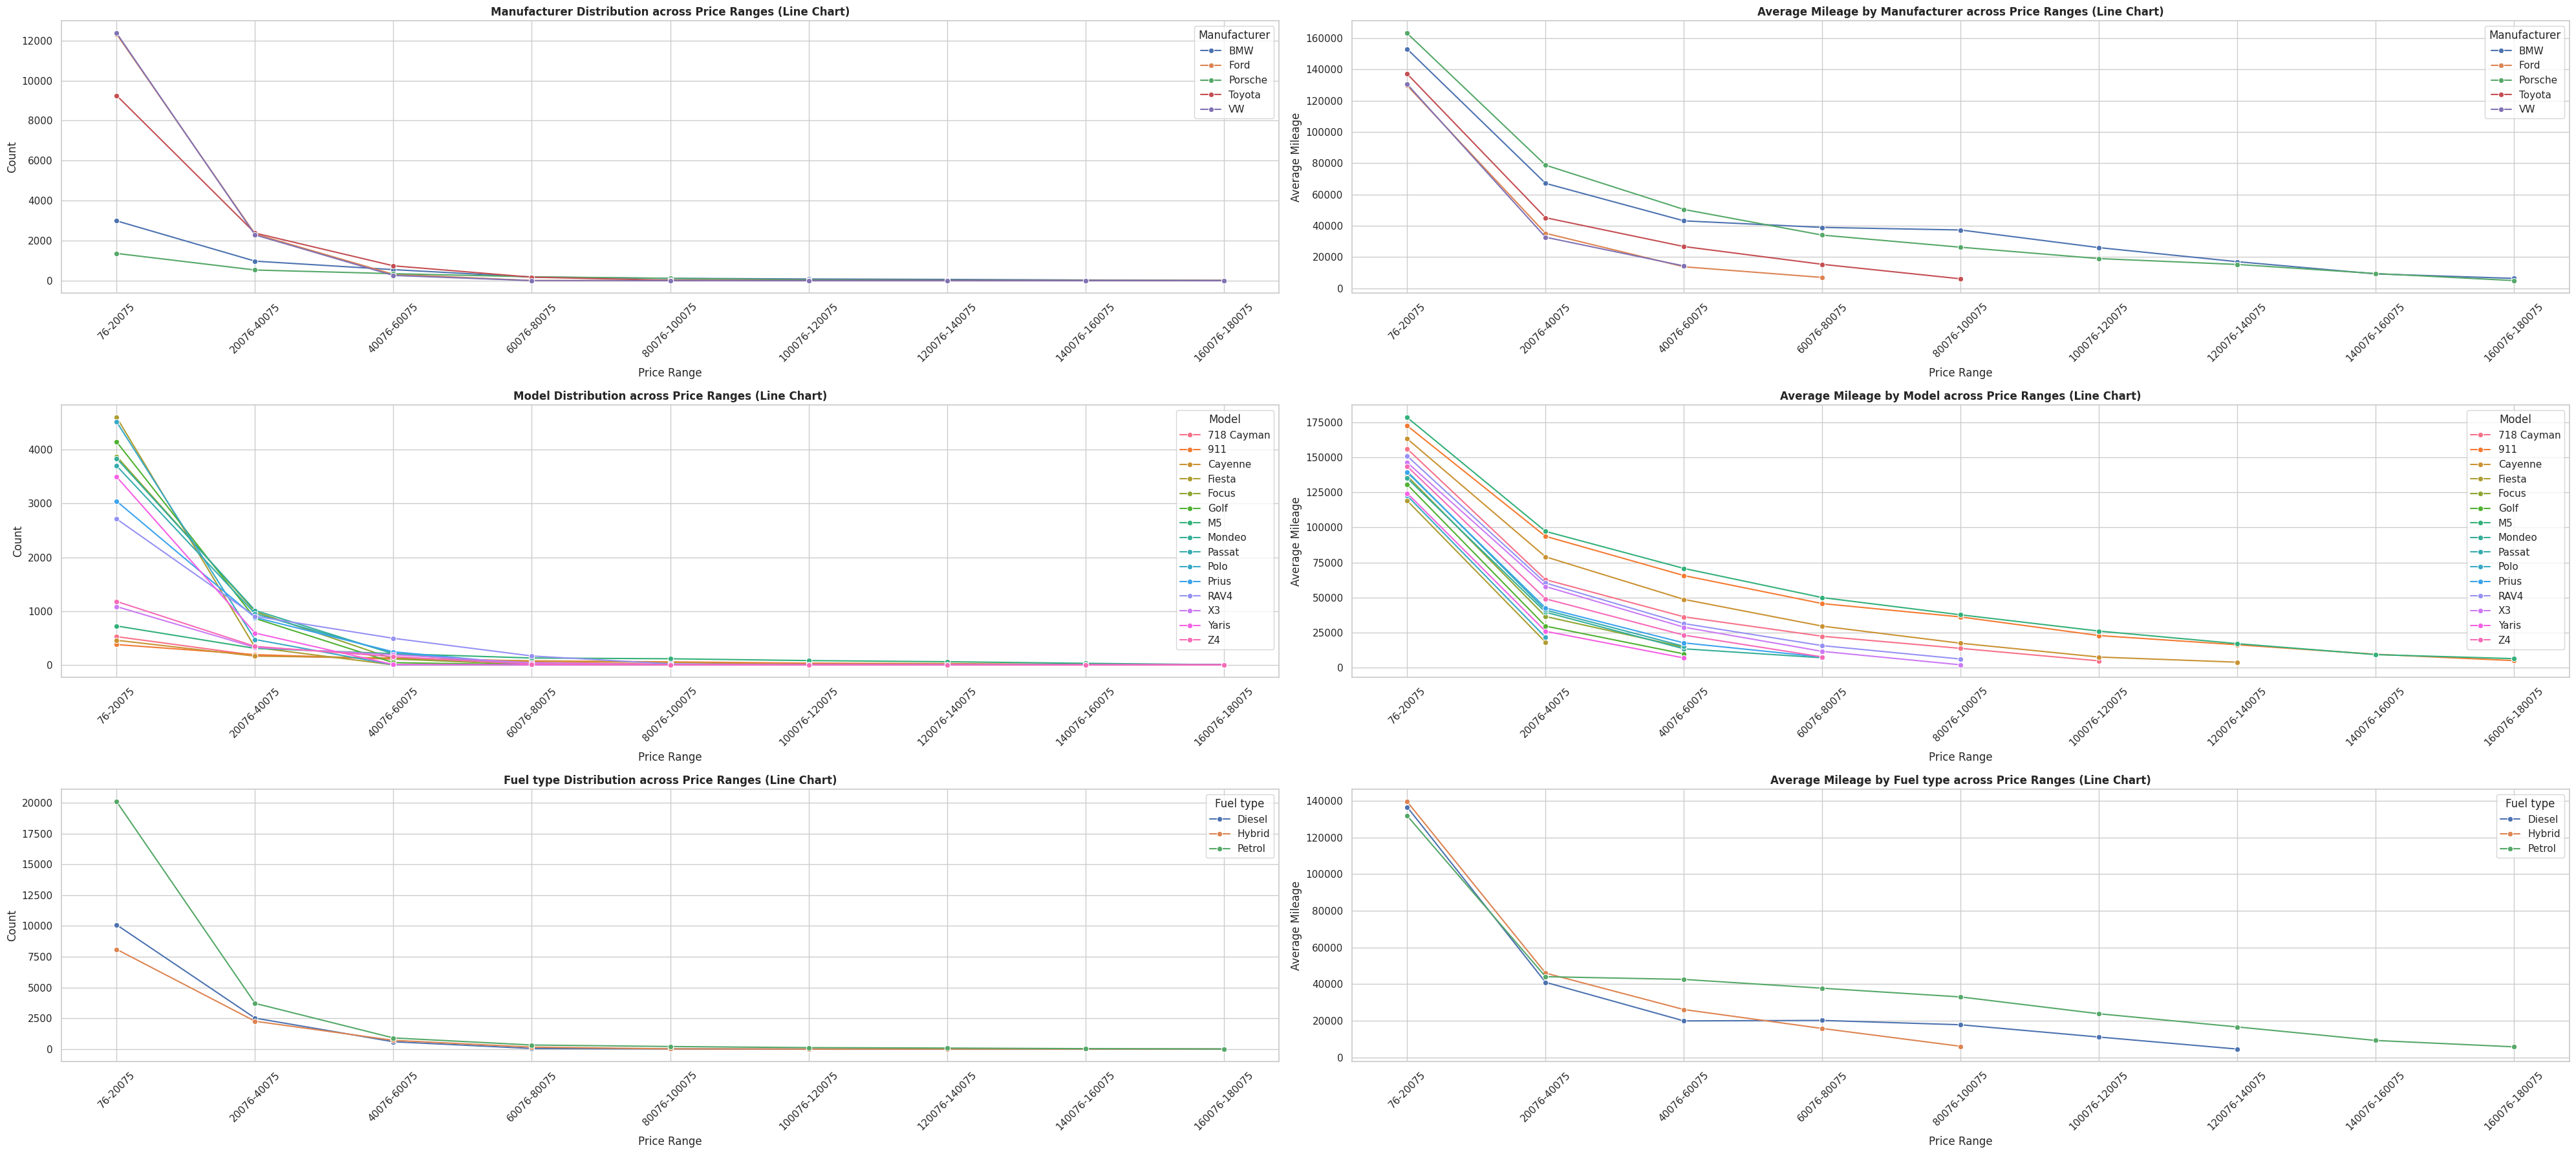

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set visual style
sns.set(style='whitegrid')

# Define price bin size (e.g., 10000 for 10k, 20000 for 20k)
bin_size = 20000  # you can change this to 10000, 5000, etc.
data1['Price_Range'] = pd.cut(
    data1['Price'],
    bins=range(int(data1['Price'].min()), int(data1['Price'].max()) + bin_size, bin_size),
    right=False,
    labels=[f"{p}-{p+bin_size-1}" for p in range(int(data1['Price'].min()), int(data1['Price'].max()), bin_size)]
)

# Select categorical columns, optionally exclude 'Used/New Car' if needed
categorical = data1.select_dtypes(include='object').drop(columns=['Used/New Car'], errors='ignore')
price_col = 'Price_Range'

# Set up subplots
fig, axes = plt.subplots(len(categorical.columns), 2, figsize=(40, 6 * len(categorical.columns)))

for i, col in enumerate(categorical.columns):
    # 1. Line plot: count of cars per category per price bin
    count_data = data1.groupby([price_col, col]).size().reset_index(name='Count')
    sns.lineplot(data=count_data, x=price_col, y='Count', hue=col, marker='o', ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} Distribution across Price Ranges (Line Chart)", fontsize=12, fontweight="bold")
    axes[i, 0].tick_params(axis='x', rotation=45)
    axes[i, 0].set_xlabel("Price Range")
    axes[i, 0].set_ylabel("Count")

    # 2. Line plot: average mileage per category per price bin
    avg_mileage = data1.groupby([price_col, col])['Mileage'].mean().reset_index()
    sns.lineplot(data=avg_mileage, x=price_col, y='Mileage', hue=col, marker='o', ax=axes[i, 1])
    axes[i, 1].set_title(f"Average Mileage by {col} across Price Ranges (Line Chart)", fontsize=12, fontweight="bold")
    axes[i, 1].tick_params(axis='x', rotation=45)
    axes[i, 1].set_xlabel("Price Range")
    axes[i, 1].set_ylabel("Average Mileage")

# Adjust layout
plt.tight_layout()
plt.show()


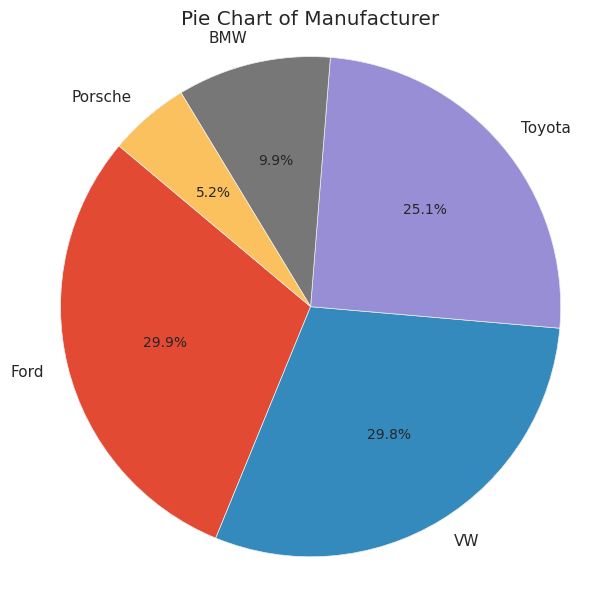

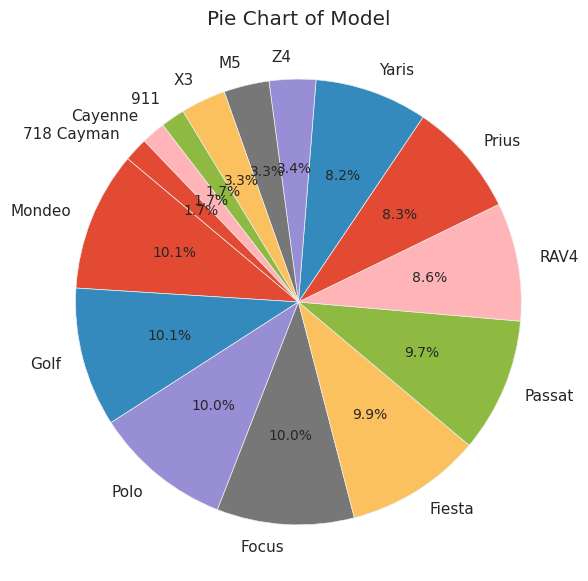

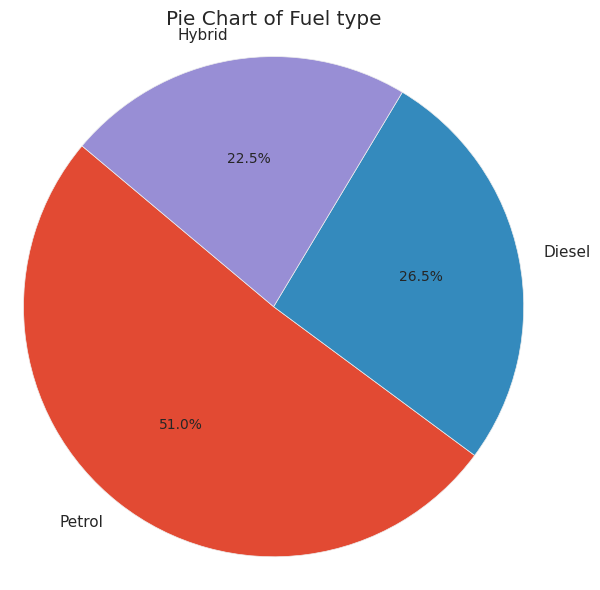

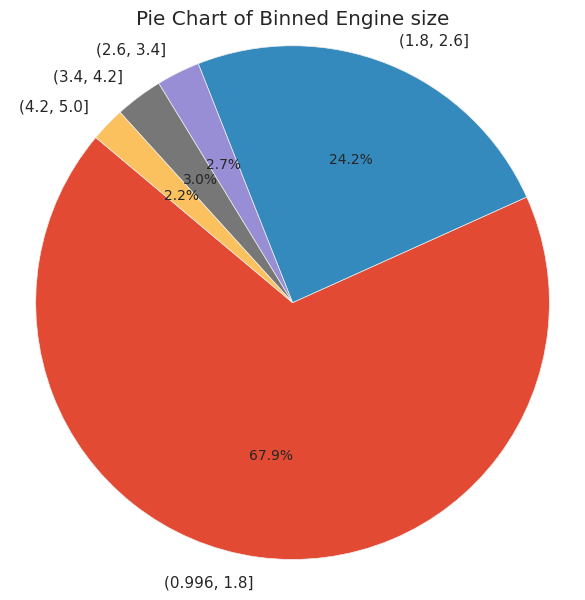

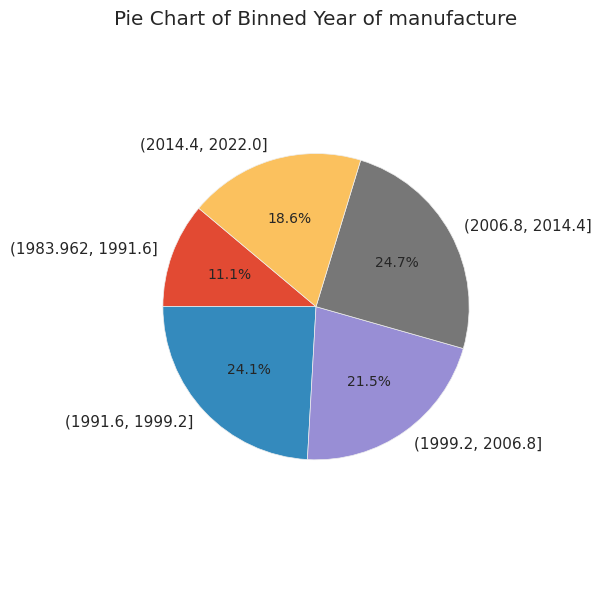

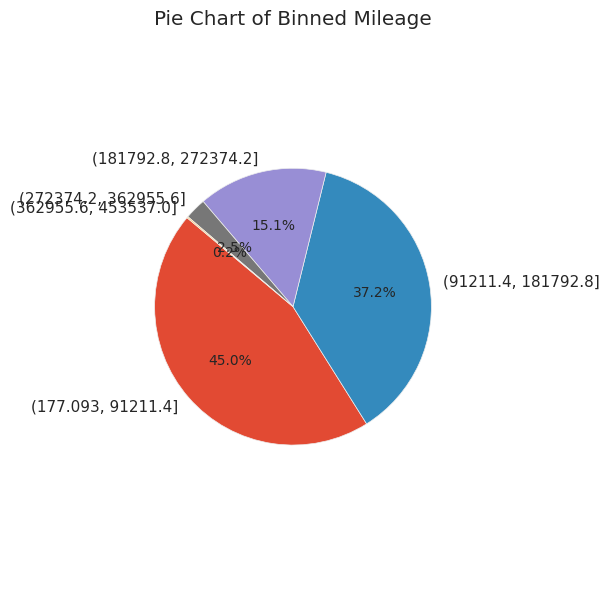

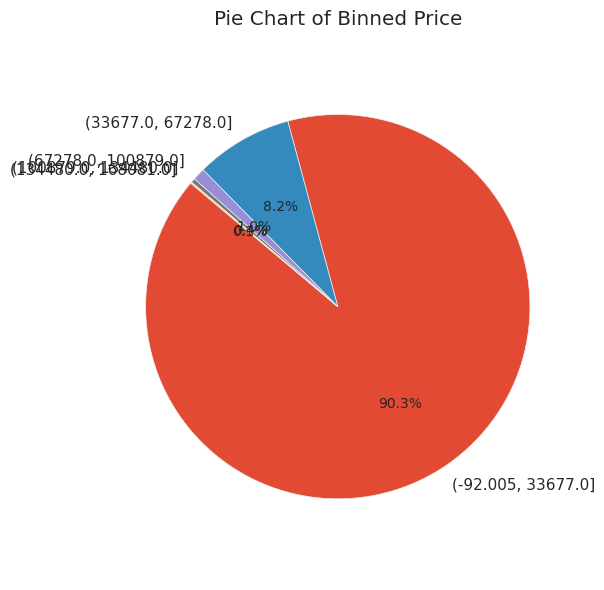

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named data1
# Identify numerical and categorical columns
numerical_cols = data1.select_dtypes(include='number').columns
categorical_cols = data1.select_dtypes(include='object').columns

# Set figure style
plt.style.use('ggplot')

# --- PIE CHARTS FOR CATEGORICAL COLUMNS ---
for col in categorical_cols:
    counts = data1[col].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Pie Chart of {col}")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()

# --- PIE CHARTS FOR NUMERICAL COLUMNS ---
# We'll group numerical values into bins and count their occurrences
for col in numerical_cols:
    binned = pd.cut(data1[col], bins=5)  # You can change number of bins
    counts = binned.value_counts().sort_index()

    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=[str(interval) for interval in counts.index], autopct='%1.1f%%', startangle=140)
    plt.title(f"Pie Chart of Binned {col}")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


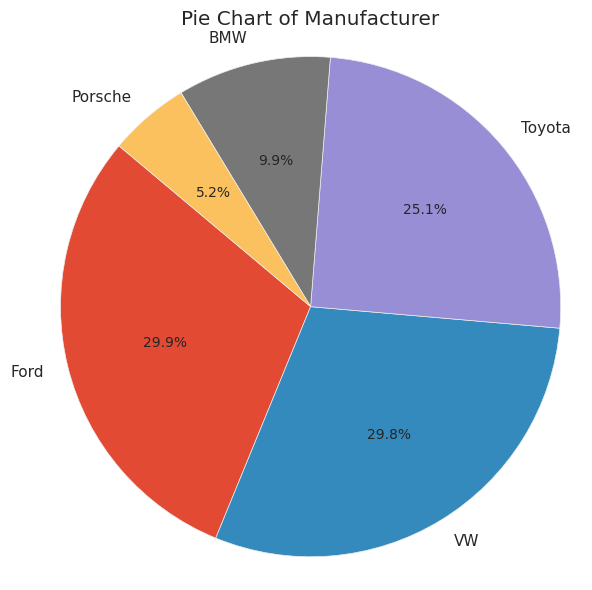

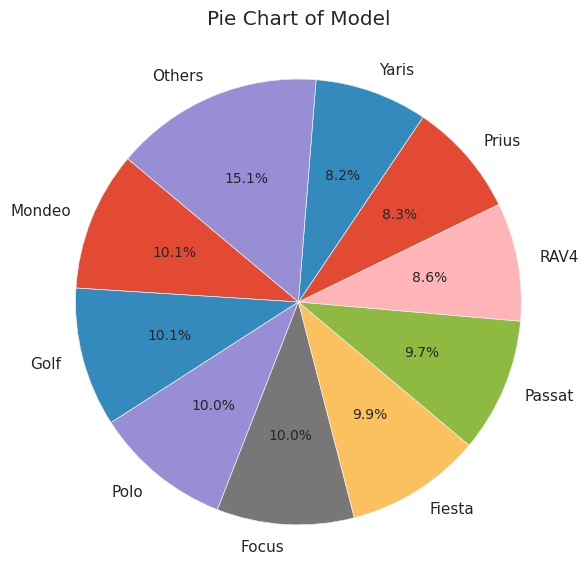

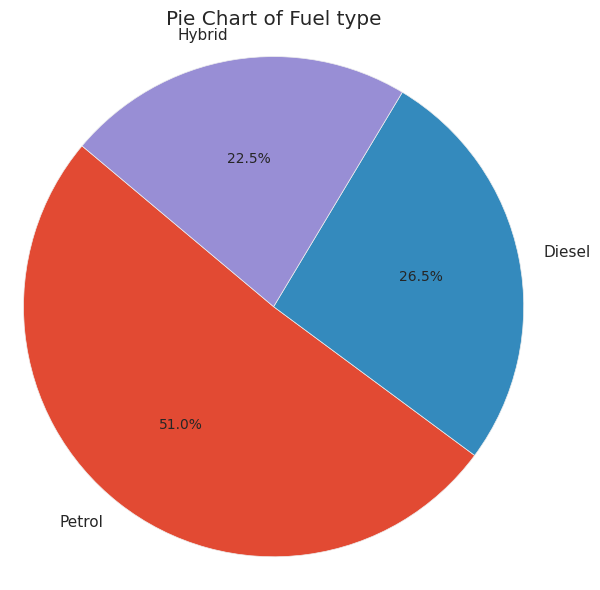

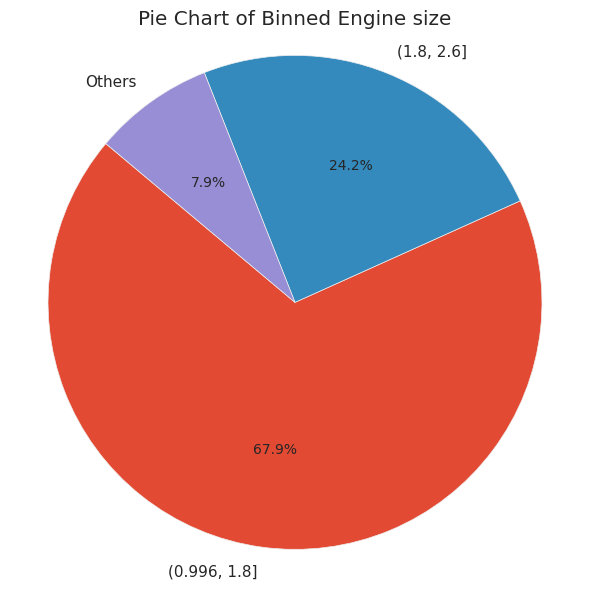

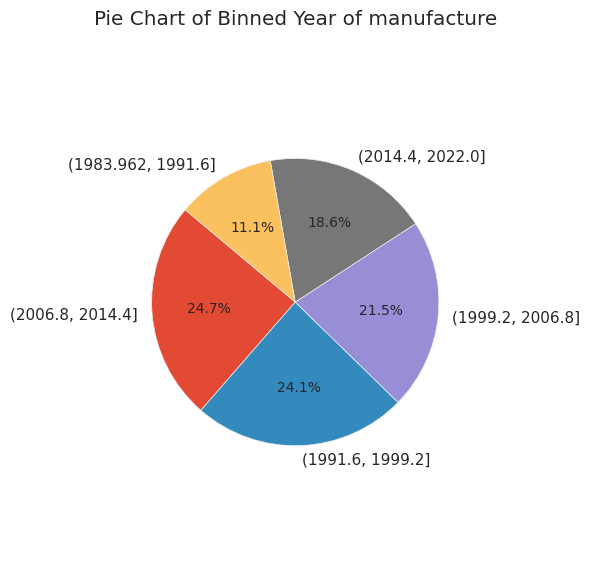

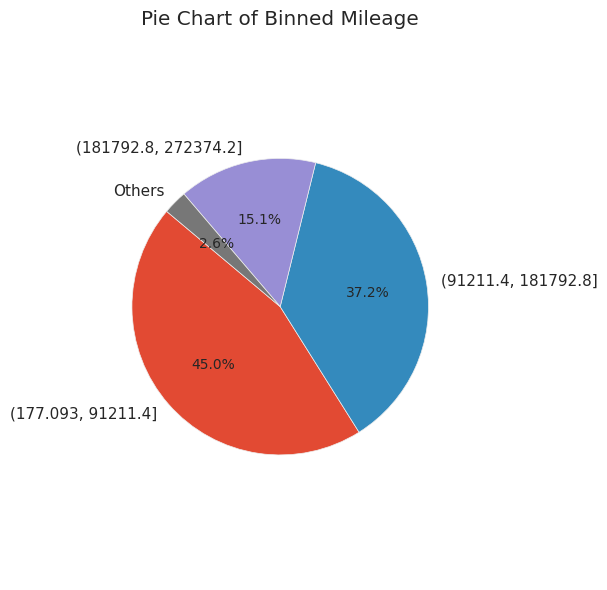

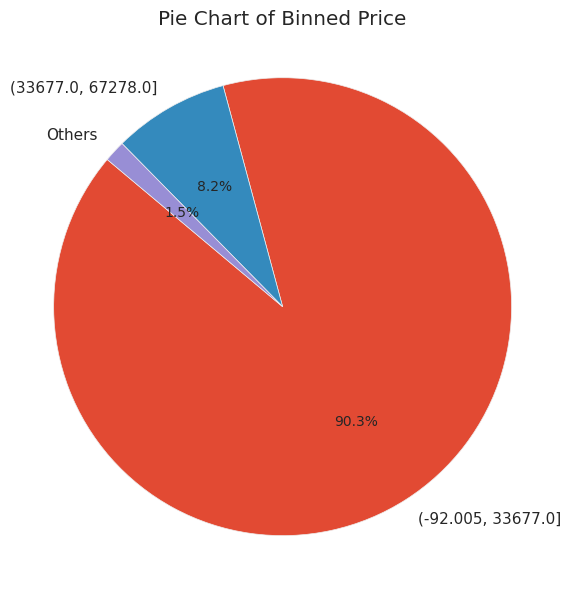

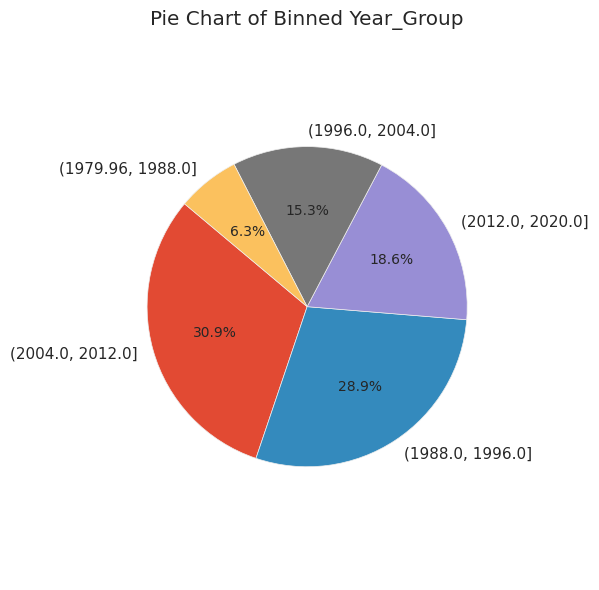

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Identify numerical and categorical columns
numerical_cols = data1.select_dtypes(include='number').columns
categorical_cols = data1.select_dtypes(include='object').columns

# Set figure style
plt.style.use('ggplot')

# --- PIE CHARTS FOR CATEGORICAL COLUMNS ---
for col in categorical_cols:
    counts = data1[col].value_counts(normalize=True) * 100  # percentages

    # Separate values < 5% into "Others"
    small = counts[counts < 5].sum()   # sum of all small categories
    counts = counts[counts >= 5]       # keep big categories
    if small > 0:
        counts["Others"] = small       # add Others category

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title(f"Pie Chart of {col}")
    plt.axis('equal')  # Equal aspect ratio ensures a circle
    plt.tight_layout()
    plt.show()

# --- PIE CHARTS FOR NUMERICAL COLUMNS ---
# Group numerical values into bins and count their occurrences
for col in numerical_cols:
    binned = pd.cut(data1[col], bins=5)  # divide into 5 bins
    counts = binned.value_counts(normalize=True) * 100  # percentages

    # Group bins < 5% into "Others"
    small = counts[counts < 5].sum()
    counts = counts[counts >= 5]
    if small > 0:
        counts["Others"] = small

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(
        counts,
        labels=[str(interval) for interval in counts.index],
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title(f"Pie Chart of Binned {col}")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


# Model and Prediction

# Model ML

===== PRICE PREDICTION =====
Random Forest Regression Results (Price):
R² Score: 0.9985
RMSE: 643.69
Train R²: 0.9997732289898913
Train RMSE: 247.09717874706948
Test R²: 0.9984694386291222
Test RMSE: 643.6858823408551
Cross-Validation R² scores: [0.99825934 0.99813521 0.99849287 0.99854393 0.9986049 ]
Mean CV R²: 0.9984072500429317


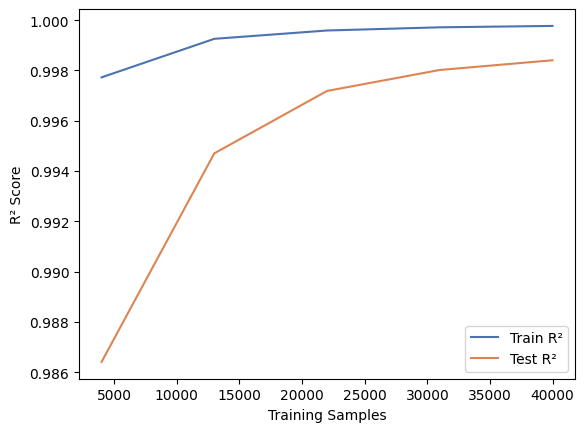

Model metadata saved to 'model_metadata.json'


In [7]:


# change data types into categorey
data[catigorical.columns] = data[catigorical.columns].astype('category')

# one hot encoding for categorical data
data = pd.get_dummies(data, columns=['Manufacturer', 'Model', 'Fuel type'], drop_first=True)

import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import joblib  # For saving and loading models

# Set plot styles
plt.style.use('default')
sns.set_palette("deep")


# =======================
# === FEATURE SELECTION ===
# =======================
X = data.drop("Price", axis=1)  # Input features
y = data["Price"]  # Target: Price

# ========================
# === SCALING FEATURES ===
# ========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# =======================
# === SPLIT THE DATA ===
# =======================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ======================================
# === MODEL 1: RANDOM FOREST for PRICE ===
# ======================================
print("===== PRICE PREDICTION =====")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print("Random Forest Regression Results (Price):")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predictions on train and test
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Train metrics
print("Train R²:", r2_score(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

# Test metrics
print("Test R²:", r2_score(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5, scoring="r2")
print("Cross-Validation R² scores:", scores)
print("Mean CV R²:", scores.mean())


from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    rf, X, y, cv=5, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Train R²")
plt.plot(train_sizes, test_mean, label="Test R²")
plt.xlabel("Training Samples")
plt.ylabel("R² Score")
plt.legend()
plt.show()


joblib.dump(rf, "price_model.pkl")


import json

# Save metadata
features_list = data.drop("Price", axis=1).columns.tolist()

model_metadata = {
    'features': features_list,
    'targets': ['Price'],
    'model_types': ['RandomForestRegressor']
}

with open('model_metadata.json', 'w') as f:
    json.dump(model_metadata, f)

print("Model metadata saved to 'model_metadata.json'")



# MAKE PREDICTIONS FOR MODEL ML

In [8]:
import joblib
import pandas as pd

# Load the model
loaded_price_model = joblib.load('/content/price_model.pkl')

# --- Create example data for prediction ---
feature_cols = ["Engine size", "Year of manufacture", "Mileage",
 "Manufacturer_Ford", "Manufacturer_Porsche", "Manufacturer_Toyota", "Manufacturer_VW",
 "Model_911", "Model_Cayenne", "Model_Fiesta", "Model_Focus", "Model_Golf", "Model_M5",
 "Model_Mondeo", "Model_Passat", "Model_Polo", "Model_Prius", "Model_RAV4", "Model_X3",
 "Model_Yaris", "Model_Z4",
 "Fuel type_Hybrid", "Fuel type_Petrol"]

example_data = pd.DataFrame([
    [1.8, 2015, 80000, 0,0,1,0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0,1],   # Toyota Corolla, Petrol
    [3.0, 2020, 20000, 0,1,0,0, 1,0,0,0,0,0,0,0,0,0,0,0,0,0, 0,1],   # Porsche 911, Petrol
    [2.0, 2018, 60000, 0,0,0,1, 0,0,0,0,1,0,0,0,0,0,0,0,0,0, 1,0],   # VW Golf, Hybrid
    [1.4, 2012, 120000, 1,0,0,0, 0,0,1,0,0,0,0,0,0,0,0,0,0,0, 0,1],  # Ford Fiesta, Petrol
], columns=feature_cols)

# --- Make predictions ---
price_predictions = loaded_price_model.predict(example_data)

# --- Decode categorical columns ---
decoded_rows = []
for i, row in example_data.iterrows():
    # Manufacturer
    manufacturer = "Unknown"
    for m in ["Ford","Porsche","Toyota","VW"]:
        if row[f"Manufacturer_{m}"] == 1:
            manufacturer = m
    # Model
    model = "Unknown"
    for m in ["911","Cayenne","Fiesta","Focus","Golf","M5","Mondeo","Passat",
              "Polo","Prius","RAV4","X3","Yaris","Z4"]:
        if row[f"Model_{m}"] == 1:
            model = m
    # Fuel type
    if row["Fuel type_Hybrid"] == 1:
        fuel = "Hybrid"
    elif row["Fuel type_Petrol"] == 1:
        fuel = "Petrol"
    else:
        fuel = "Other"
    decoded_rows.append({
        "Engine size": row["Engine size"],
        "Year of manufacture": row["Year of manufacture"],
        "Mileage": row["Mileage"],
        "Manufacturer": manufacturer,
        "Model": model,
        "Fuel type": fuel,
        "Predicted Price": price_predictions[i]
    })

results = pd.DataFrame(decoded_rows)

# --- Display predictions ---
print("\nPredictions with readable labels:")
print(results)


Predictions with readable labels:
   Engine size  Year of manufacture   Mileage Manufacturer    Model Fuel type  \
0          1.8               2015.0   80000.0       Toyota  Unknown    Petrol   
1          3.0               2020.0   20000.0      Porsche      911    Petrol   
2          2.0               2018.0   60000.0           VW     Golf    Hybrid   
3          1.4               2012.0  120000.0         Ford   Fiesta    Petrol   

   Predicted Price  
0         54530.83  
1         60713.69  
2         54664.01  
3         54530.83  


# MODEL DL

In [9]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Set plot styles
plt.style.use('default')
sns.set_palette("deep")

# =======================
# === FEATURE SELECTION ===
# =======================
X = data.drop("Price", axis=1)
y = data["Price"]

# ========================
# === SCALING FEATURES ===
# ========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# =======================
# === SPLIT THE DATA ===
# =======================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ============================
# === DEEP LEARNING MODEL ===
# ============================
print("===== PRICE PREDICTION USING DEEP LEARNING =====")

model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# === TRAINING ===
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# === PREDICTION AND EVALUATION ===
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

# Metrics
print("\nTrain R²:", r2_score(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

# ==============================
# === SAVE MODEL & METADATA ===
# ==============================

# Ensure DL folder exists
os.makedirs("DL", exist_ok=True)

# Save the model
model.save("DL/price_dl_model.h5")

# Save metadata
features_list = data.drop("Price", axis=1).columns.tolist()
model_metadata = {
    'features': features_list,
    'targets': ['Price'],
    'model_types': ['DeepLearning (Keras Sequential)']
}

with open('DL/model_metadata.json', 'w') as f:
    json.dump(model_metadata, f)

print("Model and metadata saved in 'DL/' folder.")


===== PRICE PREDICTION USING DEEP LEARNING =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 348836384.0000 - mae: 11237.9199 - val_loss: 59330384.0000 - val_mae: 3944.9800
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 52369440.0000 - mae: 3658.3425 - val_loss: 30797362.0000 - val_mae: 2805.0359
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 29400942.0000 - mae: 2841.2400 - val_loss: 22008828.0000 - val_mae: 2387.2559
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 20879224.0000 - mae: 2348.9973 - val_loss: 15692904.0000 - val_mae: 1770.0267
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 17803394.0000 - mae: 1990.7289 - val_loss: 11555473.0000 - val_mae: 1381.3751
Epoch 6/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 13037990.0000 - mae: 1734.5985 - val_loss: 9070239.0000 - val_mae: 1154.1229
Epoch 7/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 11987234.0000 - mae: 1661.9526 - val_loss: 7438271.0000 - val_mae: 994.7465
Epoch 8/100
11


Train R²: 0.9994456171989441
Train RMSE: 386.35712511224637
Test R²: 0.9993494153022766
Test RMSE: 419.66618058285326
Model and metadata saved in 'DL/' folder.


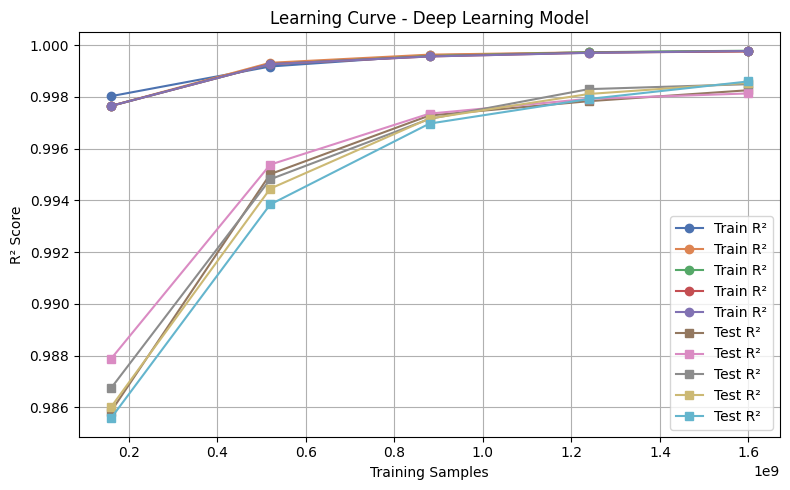

In [10]:
# === Plot Learning Curve ===
plt.figure(figsize=(8, 5))
plt.plot(train_sizes * len(X_train), train_scores, label="Train R²", marker='o')
plt.plot(train_sizes * len(X_train), test_scores, label="Test R²", marker='s')
plt.xlabel("Training Samples")
plt.ylabel("R² Score")
plt.title("Learning Curve - Deep Learning Model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# MAKE PREDICTIONS FOR MODEL DL

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# --- Load Model (FIXED) ---
# Load without compiling to avoid 'mse' error
model = load_model('DL/price_dl_model.h5', compile=False)

# Recompile the model after loading
model.compile(optimizer='adam', loss=MeanSquaredError())

# --- Create Example Input Data ---
feature_cols = ["Engine size", "Year of manufacture", "Mileage",
 "Manufacturer_Ford", "Manufacturer_Porsche", "Manufacturer_Toyota", "Manufacturer_VW",
 "Model_911", "Model_Cayenne", "Model_Fiesta", "Model_Focus", "Model_Golf", "Model_M5",
 "Model_Mondeo", "Model_Passat", "Model_Polo", "Model_Prius", "Model_RAV4", "Model_X3",
 "Model_Yaris", "Model_Z4",
 "Fuel type_Hybrid", "Fuel type_Petrol"]

example_data = pd.DataFrame([
    [1.8, 2015, 80000, 0,0,1,0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0,1],   # Toyota Corolla, Petrol
    [3.0, 2020, 20000, 0,1,0,0, 1,0,0,0,0,0,0,0,0,0,0,0,0,0, 0,1],   # Porsche 911, Petrol
    [2.0, 2018, 60000, 0,0,0,1, 0,0,0,0,1,0,0,0,0,0,0,0,0,0, 1,0],   # VW Golf, Hybrid
    [1.4, 2012, 120000, 1,0,0,0, 0,0,1,0,0,0,0,0,0,0,0,0,0,0, 0,1],  # Ford Fiesta, Petrol
], columns=feature_cols)

# --- Scaling Example Data ---
# Make sure the same scaler used during training is used here
# Recreate it and fit on full training feature data
X_full = data.drop("Price", axis=1)
scaler = StandardScaler()
scaler.fit(X_full)  # Fit using full training data
example_scaled = scaler.transform(example_data)

# --- Predict ---
predicted_prices = model.predict(example_scaled).flatten()

# --- Decode for readable output ---
decoded_rows = []
for i, row in example_data.iterrows():
    manufacturer = "Unknown"
    for m in ["Ford", "Porsche", "Toyota", "VW"]:
        if row.get(f"Manufacturer_{m}", 0) == 1:
            manufacturer = m

    model_name = "Unknown"
    for m in ["911", "Cayenne", "Fiesta", "Focus", "Golf", "M5", "Mondeo",
              "Passat", "Polo", "Prius", "RAV4", "X3", "Yaris", "Z4"]:
        if row.get(f"Model_{m}", 0) == 1:
            model_name = m

    fuel = "Hybrid" if row.get("Fuel type_Hybrid", 0) == 1 else (
        "Petrol" if row.get("Fuel type_Petrol", 0) == 1 else "Other"
    )

    decoded_rows.append({
        "Engine size": row["Engine size"],
        "Year of manufacture": row["Year of manufacture"],
        "Mileage": row["Mileage"],
        "Manufacturer": manufacturer,
        "Model": model_name,
        "Fuel type": fuel,
        "Predicted Price": predicted_prices[i]
    })

# --- Display ---
results_df = pd.DataFrame(decoded_rows)
print("\nPredictions with readable labels (DL):")
print(results_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

Predictions with readable labels (DL):
   Engine size  Year of manufacture   Mileage Manufacturer    Model Fuel type  \
0          1.8               2015.0   80000.0       Toyota  Unknown    Petrol   
1          3.0               2020.0   20000.0      Porsche      911    Petrol   
2          2.0               2018.0   60000.0           VW     Golf    Hybrid   
3          1.4               2012.0  120000.0         Ford   Fiesta    Petrol   

   Predicted Price  
0     20954.820312  
1    122688.281250  
2     29949.912109  
3      7307.562988  


# SAVE DATA CSV AFTER CLEANING

In [ ]:
# Save the DataFrame to a CSV file after cleaning
data1.to_csv('processed_car_sales_data.csv', index=False)
print("DataFrame saved to 'processed_car_sales_data.csv'")
from google.colab import files

# Trigger file download
files.download('processed_car_sales_data.csv')